In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, lognorm, expon, geom, poisson
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import levene, shapiro, kstest, f_oneway, chi2_contingency, chi2, chisquare, kruskal, pearsonr, spearmanr, boxcox
from statsmodels.graphics.gofplots import qqplot
import unicodedata

In [3]:
yulu = pd.read_csv('yulu_data.csv')

## `EXPLORATORY DATA ANALYSIS`

In [4]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### There are 10,886 rows and 12 columns in the dataset.

In [6]:
yulu.shape

(10886, 12)

***

## `Data Types of Attributes:`
#### - `datetime:` object data type
#### - `season:` int64 data type (1 --> Spring, 2 --> Summer, 3 --> Fall, 4 --> Winter)
#### - `holiday:` int64 data type
#### - `workingday:` int64 data type
#### - `weather:` int64 data type (1 --> Clear, partly cloudy, 2 --> Cloudy + Mist, 3 --> Light Rain, 4 --> Heavy Rain)
#### - `temp:` float64 data type
#### - `atemp:` float64 data type
#### - `humidity:` int64 data type
#### - `windspeed:` float64 data type
#### - `casual:` int64 data type
#### - `registered:` int64 data type
#### - `count:` int64 data type

In [7]:
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

***

## `Data Type Conversions`

In [8]:
yulu['datetime'] = yulu['datetime'].astype('datetime64[ns]')

In [9]:
yulu['holiday'] = yulu['holiday'].astype('category')
yulu['workingday'] = yulu['workingday'].astype('category')

In [10]:
yulu.describe()

,season,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
yulu.describe(include = ["object", "category"])

,holiday,workingday
count,10886,10886
unique,2,2
top,0,1
freq,10575,7412


## `Missing Value Detection`

In [12]:
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

***

## `Univariate Analysis`

### `1. Season:` As season is a categorical variable, we can use count plot to visualize its distribution. 

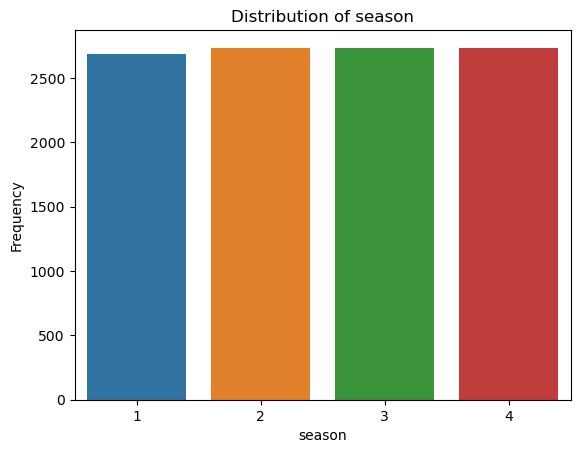

In [13]:
sns.countplot(data = yulu, x = 'season')
plt.ylabel('Frequency')
plt.title('Distribution of season')
plt.show()

#### - Frequency of data points for all the seasons are almost the same.

### `2. Holiday:` As holiday is a categorical variable, we can use count plot to visualize its distribution. 

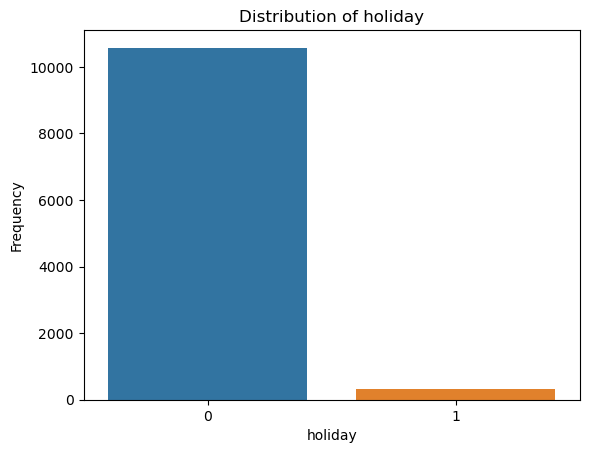

In [14]:
sns.countplot(data = yulu, x = 'holiday')
plt.ylabel('Frequency')
plt.title('Distribution of holiday')
plt.show()

#### - Most of the data points are for non-holidays

### `3. Working day:` As workingday is a categorical variable, we can use count plot to visualize its distribution. 

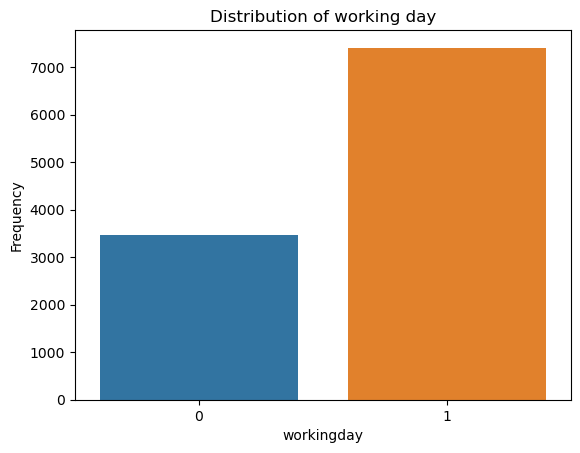

In [15]:
sns.countplot(data = yulu, x = 'workingday')
plt.ylabel('Frequency')
plt.title('Distribution of working day')
plt.show()

#### - Most of the data points are for working days.

### `4. Weather:` As weather is a categorical variable, we can use count plot to visualize its distribution. 

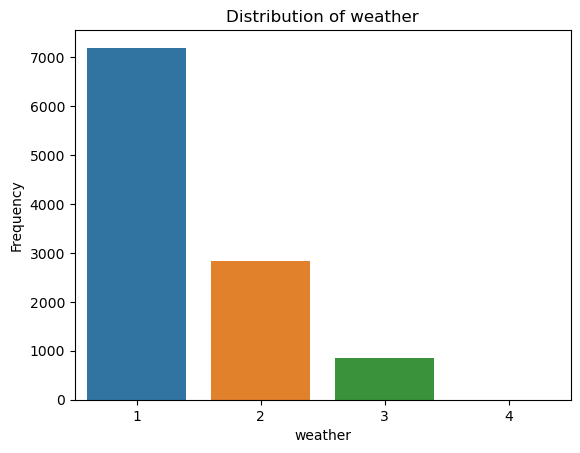

In [16]:
sns.countplot(data = yulu, x = 'weather')
plt.ylabel('Frequency')
plt.title('Distribution of weather')
plt.show()

#### - Majority of the data points are for days when the weather is clear or partly cloudy and only one data point for the days when it is heavy rains.

### `5. temp (Temperature):` As temperature is a continuous variable, we can use box plot or histogram to visualize its distribution. 

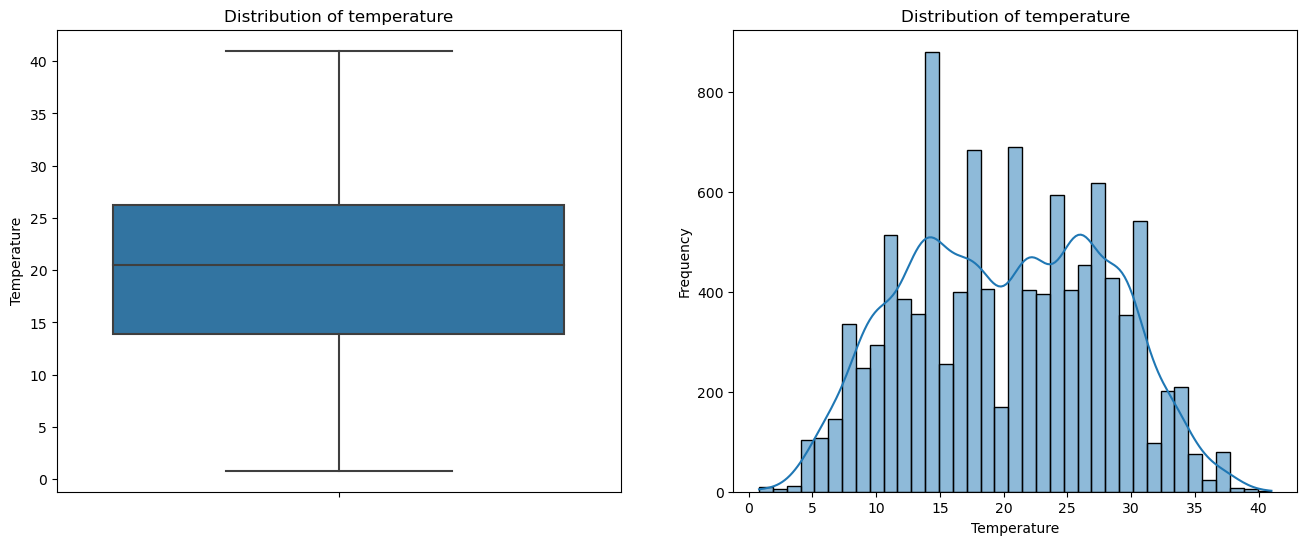

In [17]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.boxplot(data = yulu, y = 'temp')
plt.ylabel('Temperature')
plt.title('Distribution of temperature')

plt.subplot(122)
sns.histplot(data = yulu, x = 'temp', kde = True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of temperature')
plt.show()

#### - 50% of the temperature values lie in the range of 13.94 - 20.23 deg Celcius with median temperature of 20.23 deg Celcius.

### `6. atemp (Feeling Temperature):` As feeling temperature is a continuous variable, we can use box plot or histogram to visualize its distribution. 

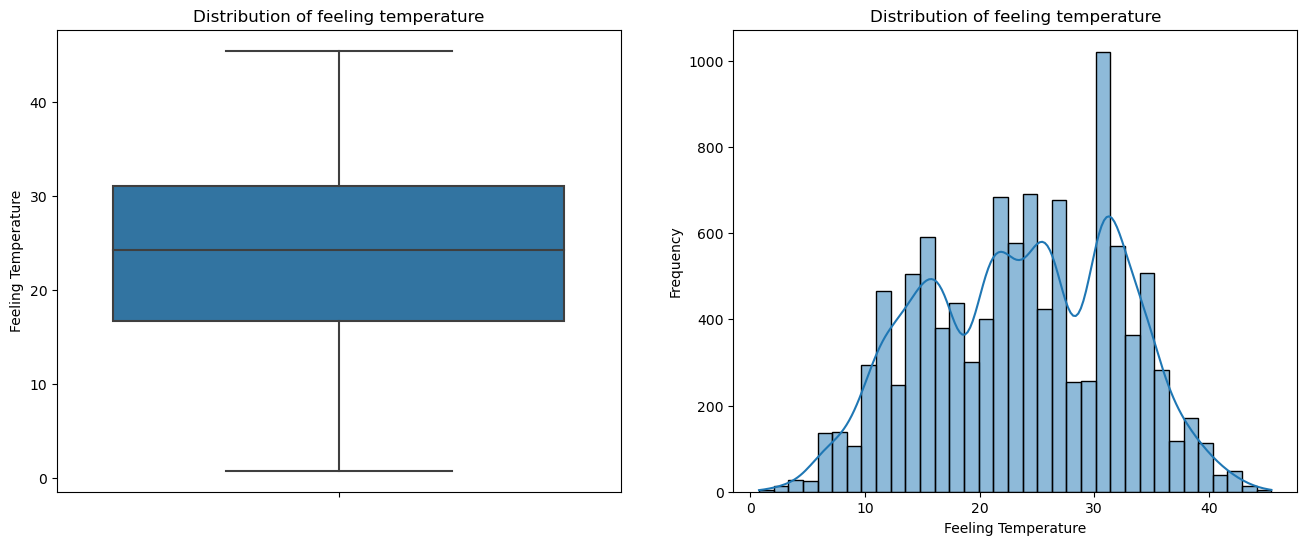

In [18]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.boxplot(data = yulu, y = 'atemp')
plt.ylabel('Feeling Temperature')
plt.title('Distribution of feeling temperature')

plt.subplot(122)
sns.histplot(data = yulu, x = 'atemp', kde = True)
plt.xlabel('Feeling Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of feeling temperature')
plt.show()

#### - 50% of the feeling temperature values lie in the range of 16.66 - 31.06 deg Celcius with median value of 23.65 deg Celcius.
#### - The distribution is multi-modal in nature.

### `7. Humidity:` As humidity is a continuous variable, we can use box plot or histogram to visualize its distribution. 

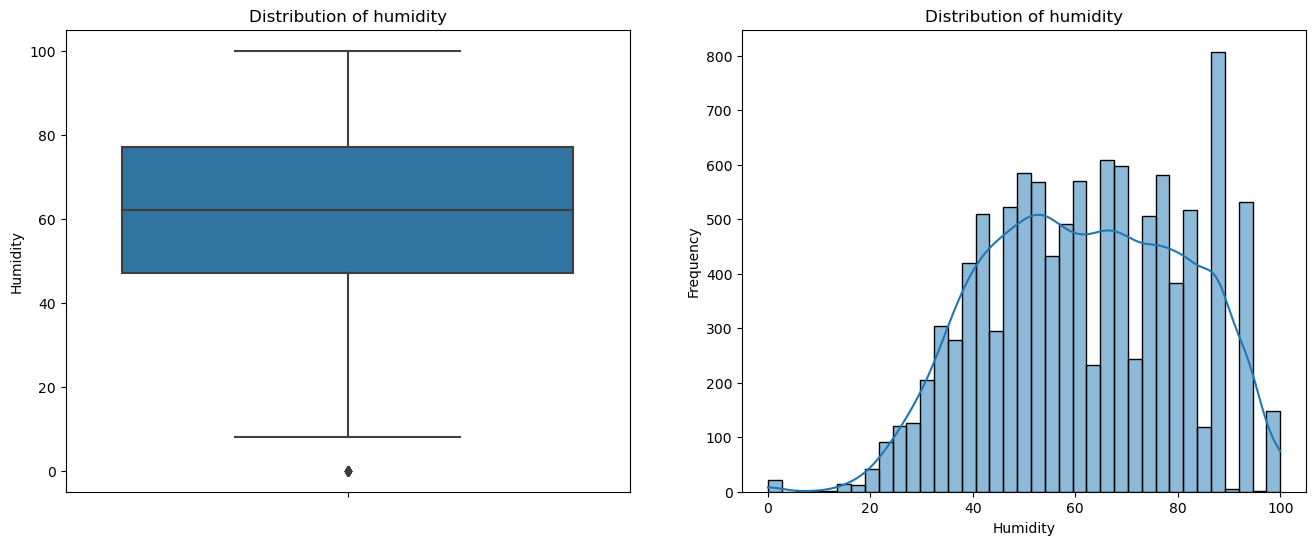

In [19]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.boxplot(data = yulu, y = 'humidity')
plt.ylabel('Humidity')
plt.title('Distribution of humidity')

plt.subplot(122)
sns.histplot(data = yulu, x = 'humidity', kde = True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of humidity')
plt.show()

#### - 50% of the humidity values lie in the range of 47 - 77 with median value of 61.88
#### - Few Outliers on the lower side.

### `8. Windspeed:` As windspeed is a continuous variable, we can use box plot or histogram to visualize its distribution. 

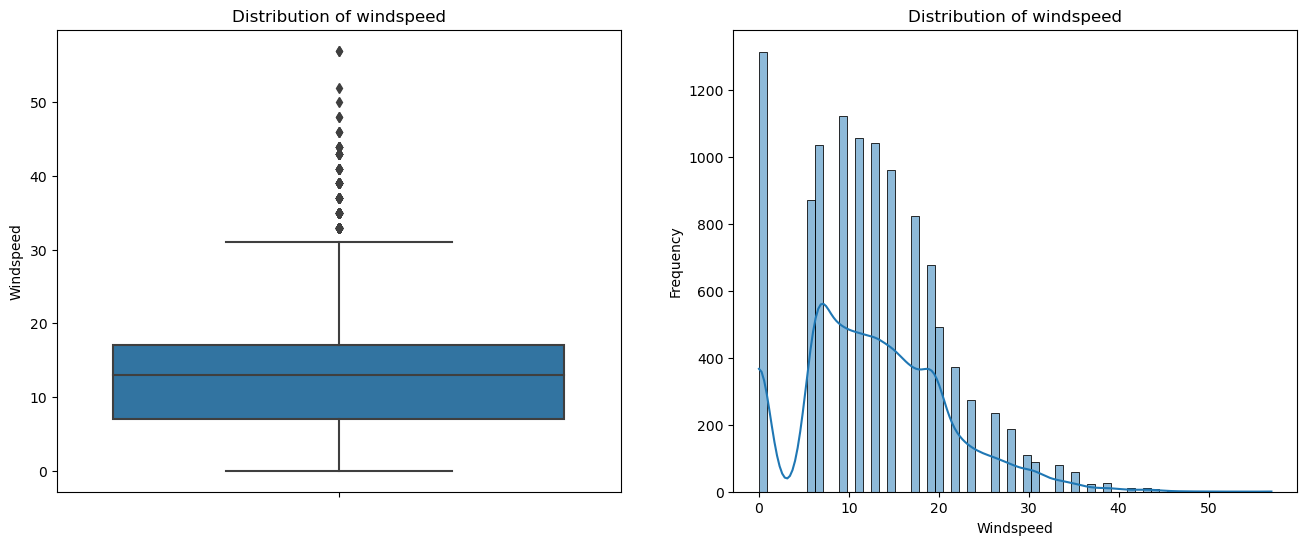

In [20]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
sns.boxplot(data = yulu, y = 'windspeed')
plt.ylabel('Windspeed')
plt.title('Distribution of windspeed')

plt.subplot(122)
sns.histplot(data = yulu, x = 'windspeed', kde = True)
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Distribution of windspeed')
plt.show()

#### - 50% of the humidity values lie in the range of 7 - 17 with median value of 12.799
#### - Outliers on the higher side.

***

## `BIVARIATE ANALYSIS`

### `1. Effect of season on weather:` Predictor variable (categorical) vs Predictor variable (categorical) 
### using `Chi Squared Test`

In [21]:
season_vs_weather = pd.crosstab(index = yulu['season'].apply(lambda s: 'Spring' if s == 1 
                                                             else 'Summer' if s == 2 
                                                             else 'Fall' if s == 3 
                                                             else 'Winter'), 
                                columns = yulu['weather'].apply(lambda x: 'clear' if x == 1 
                                                                else 'mist + cloudy' if x == 2 
                                                                else 'light rain' if x == 3 
                                                                else 'heavy rain'))

In [22]:
season_vs_weather

weather,clear,heavy rain,light rain,mist + cloudy
season,,,,
Fall,1930,0,199,604
Spring,1759,1,211,715
Summer,1801,0,224,708
Winter,1702,0,225,807


### `On a visual inspection of the above contingency table, it seems like season does affect weather.`
### - For example, among all the four seasons, fall has higher frequency of clear weather and winter has higher frequency of "mist + cloudy" weather.
### But is this data statistically significant or just by chance ??

### For finding the statistical significance of this data under the null hypothesis that "season has no effect on weather", we will use Chi Squared Test 

In [24]:
chi_stat, chi_p_val, _, _ = chi2_contingency(season_vs_weather)
if chi_p_val < 0.05:
    print(f'Chi square p-value = {chi_p_val}')
    print('Season has a statistically significant effect on weather')

else:
    print(f'Chi square p-value = {chi_p_val}')
    print('Season has no statistically significant effect on weather')    

Chi square p-value = 1.549925073686492e-07
Season has a statistically significant effect on weather


### `Null Hypothesis Rejected`: There's an effect of season on weather.

***

### `2. Effect of season on temperature:` Predictor variable "season" (categorical) vs Predictor variable "temperature" (continuous) 
### `Null Hypothesis`: There's no effect of season on temperature i.e. average temperature is similar in all seasons.

In [25]:
yulu['season'] = yulu['season'].apply(lambda s: 'Spring' if s == 1 
                                      else 'Summer' if s == 2 
                                      else 'Fall' if s == 3 
                                      else 'Winter')

In [26]:
spring_temperatures = yulu.loc[yulu['season'] == 'Spring', 'temp']
summer_temperatures = yulu.loc[yulu['season'] == 'Summer', 'temp']
fall_temperatures = yulu.loc[yulu['season'] == 'Fall', 'temp']
winter_temperatures = yulu.loc[yulu['season'] == 'Winter', 'temp']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

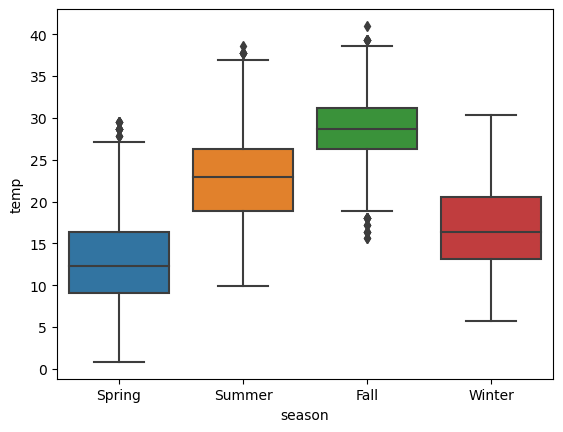

In [27]:
sns.boxplot(data = yulu, y = 'temp', x = 'season')
plt.show()

In [28]:
for season in seasons:
    print(f"The average temperature in {season} is {round(yulu.loc[yulu['season'] == season, 'temp'].mean(), 1)}{chr(176)}C")

The average temperature in Spring is 12.5°C
The average temperature in Summer is 22.8°C
The average temperature in Fall is 28.8°C
The average temperature in Winter is 16.6°C


### From the data, it seems like the temperature in all seasons are quite different.
### But is this really statistically significant or just by chance ??
### `Here we'll use Kruskal Test to check if this data is statistically significant.`

In [29]:
kruskal_stat, p_val = kruskal(spring_temperatures, summer_temperatures, fall_temperatures, winter_temperatures)
if p_val < 0.05:
    print(f'Kruskal p-value = {p_val}')
    print('Season has a statistically significant effect on temperature')
else:
    print(f'Kruskal p-value = {p_val}')
    print('Season has no statistically significant effect on temperature i.e. mean temperature is similar across different seasons')

Kruskal p-value = 0.0
Season has a statistically significant effect on temperature


### `Null Hypothesis Rejected`: There's an effect of season on temperature.

***

### `3. Effect of season on humidity:` Predictor variable "season" (categorical) vs Predictor variable "humidity" (continuous) 
### `Null Hypothesis`: There's no effect of season on temperature i.e. average humidity is similar in all seasons.

In [30]:
spring_humidity = yulu.loc[yulu['season'] == 'Spring', 'humidity']
summer_humidity = yulu.loc[yulu['season'] == 'Summer', 'humidity']
fall_humidity = yulu.loc[yulu['season'] == 'Fall', 'humidity']
winter_humidity = yulu.loc[yulu['season'] == 'Winter', 'humidity']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

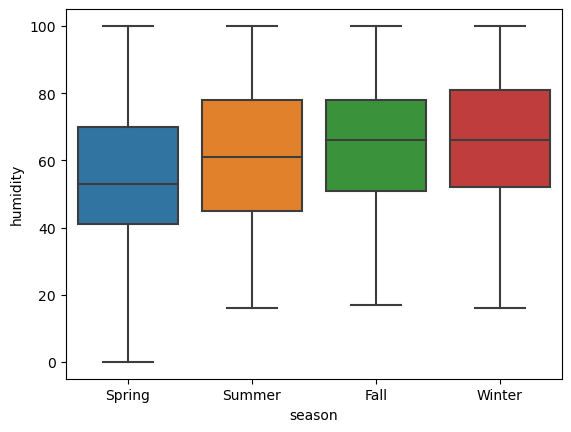

In [31]:
sns.boxplot(data = yulu, y = 'humidity', x = 'season')
plt.show()

In [32]:
for season in seasons:
    print(f"The average humidity in {season} is {round(yulu.loc[yulu['season'] == season, 'humidity'].mean(), 1)}")

The average humidity in Spring is 56.3
The average humidity in Summer is 60.9
The average humidity in Fall is 64.1
The average humidity in Winter is 66.2


### From the data, it seems like the humidity in different seasons is quite different.
### But is this really statistically significant or just by chance ??
### `Here we'll use Kruskal Test to check if this data is statistically significant.`

In [33]:
kruskal_stat, p_val = kruskal(spring_humidity, summer_humidity, fall_humidity, winter_humidity)
if p_val < 0.05:
    print(f'Kruskal p-value = {p_val}')
    print('Season has a statistically significant effect on humidity')
else:
    print(f'Kruskal p-value = {p_val}')
    print('Season has no statistically significant effect on humidity i.e. mean temperature is similar across different seasons')

Kruskal p-value = 3.1001329864330053e-86
Season has a statistically significant effect on humidity


### `Null Hypothesis Rejected`: There's an effect of season on humidity.

***

### `4. Effect of season on windspeed:` Predictor variable "season" (categorical) vs Predictor variable "windspeed" (continuous) 
### `Null Hypothesis`: There's no effect of season on windspeed i.e. average windspeed is similar in all seasons.

In [34]:
spring_windspeed = yulu.loc[yulu['season'] == 'Spring', 'windspeed']
summer_windspeed = yulu.loc[yulu['season'] == 'Summer', 'windspeed']
fall_windspeed = yulu.loc[yulu['season'] == 'Fall', 'windspeed']
winter_windspeed = yulu.loc[yulu['season'] == 'Winter', 'windspeed']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

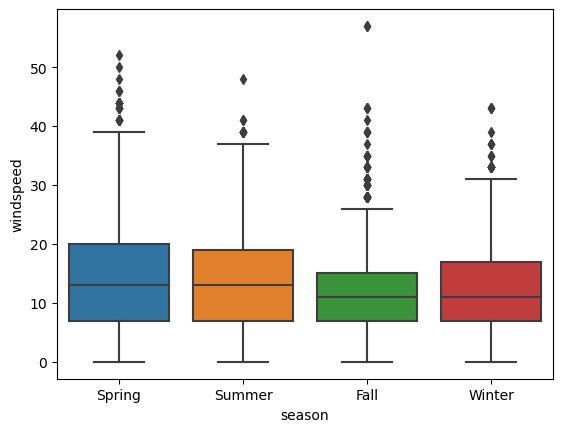

In [35]:
sns.boxplot(data = yulu, y = 'windspeed', x = 'season')
plt.show()

In [36]:
for season in seasons:
    print(f"The average windspeed in {season} is {round(yulu.loc[yulu['season'] == season, 'windspeed'].mean(), 1)}")

The average windspeed in Spring is 14.6
The average windspeed in Summer is 13.4
The average windspeed in Fall is 11.5
The average windspeed in Winter is 11.7


### From the data, it seems like there is a slight difference in windspeed across different seasons.
### But is this really statistically significant or just by chance ??
### `Here we'll use Kruskal Test to check if this data is statistically significant.`

In [37]:
kruskal_stat, p_val = kruskal(spring_windspeed, summer_windspeed, fall_windspeed, winter_windspeed)
if p_val < 0.05:
    print(f'Kruskal p-value = {p_val}')
    print('Season has a statistically significant effect on windspeed')
else:
    print(f'Kruskal p-value = {p_val}')
    print('Season has no statistically significant effect on windspeed i.e. mean windspeed is similar across different seasons')

Kruskal p-value = 8.490584997790586e-47
Season has a statistically significant effect on windspeed


### `Null Hypothesis Rejected`: There's an effect of season on windspeed.

***

## `5. Effect of "season" on "count" (number of bicycles rented)`
### `Null Hypothesis`: There's no effect of season on number of bicycles rented i.e. number of bicycles rented are similar in different seasons.

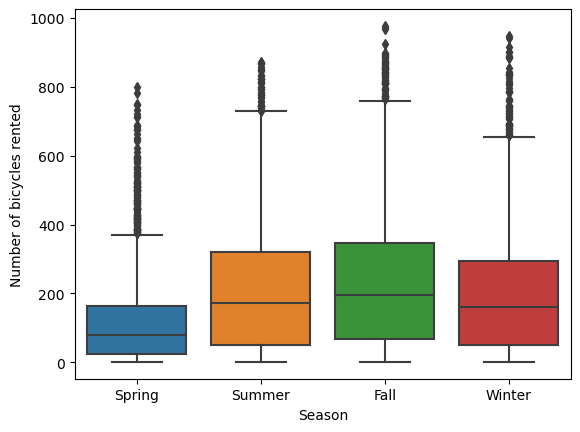

In [38]:
sns.boxplot(data = yulu, x =  "season", y = "count")
plt.xlabel('Season')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - Seems like number of cycles rented are minimum in Spring, 
#### - then increase hugely in summer, 
#### - then increase marginally in fall 
#### - and then fall marginally in winter.
#### But is this data statistically significant ??

#### As `"season"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have more than 2 categories, we will use `ANOVA` to test whether there is a statistically significant difference between the mean number of bicycles rented during different seasons.

#### But there are few assumptions of `"ANOVA"`:
#### 1. The data across different categories is independent. (For this, we'll have to trust our data)
#### 2. The data points in each category are drawn from a population having normal distribution.
#### 3. The population variance is same across all categories.

In [39]:
spring_count = yulu.loc[(yulu['season'] == 'Spring'), 'count']
summer_count = yulu.loc[(yulu['season'] == 'Summer'), 'count']
fall_count = yulu.loc[(yulu['season'] == 'Fall'), 'count']
winter_count = yulu.loc[(yulu['season'] == 'Winter'), 'count']

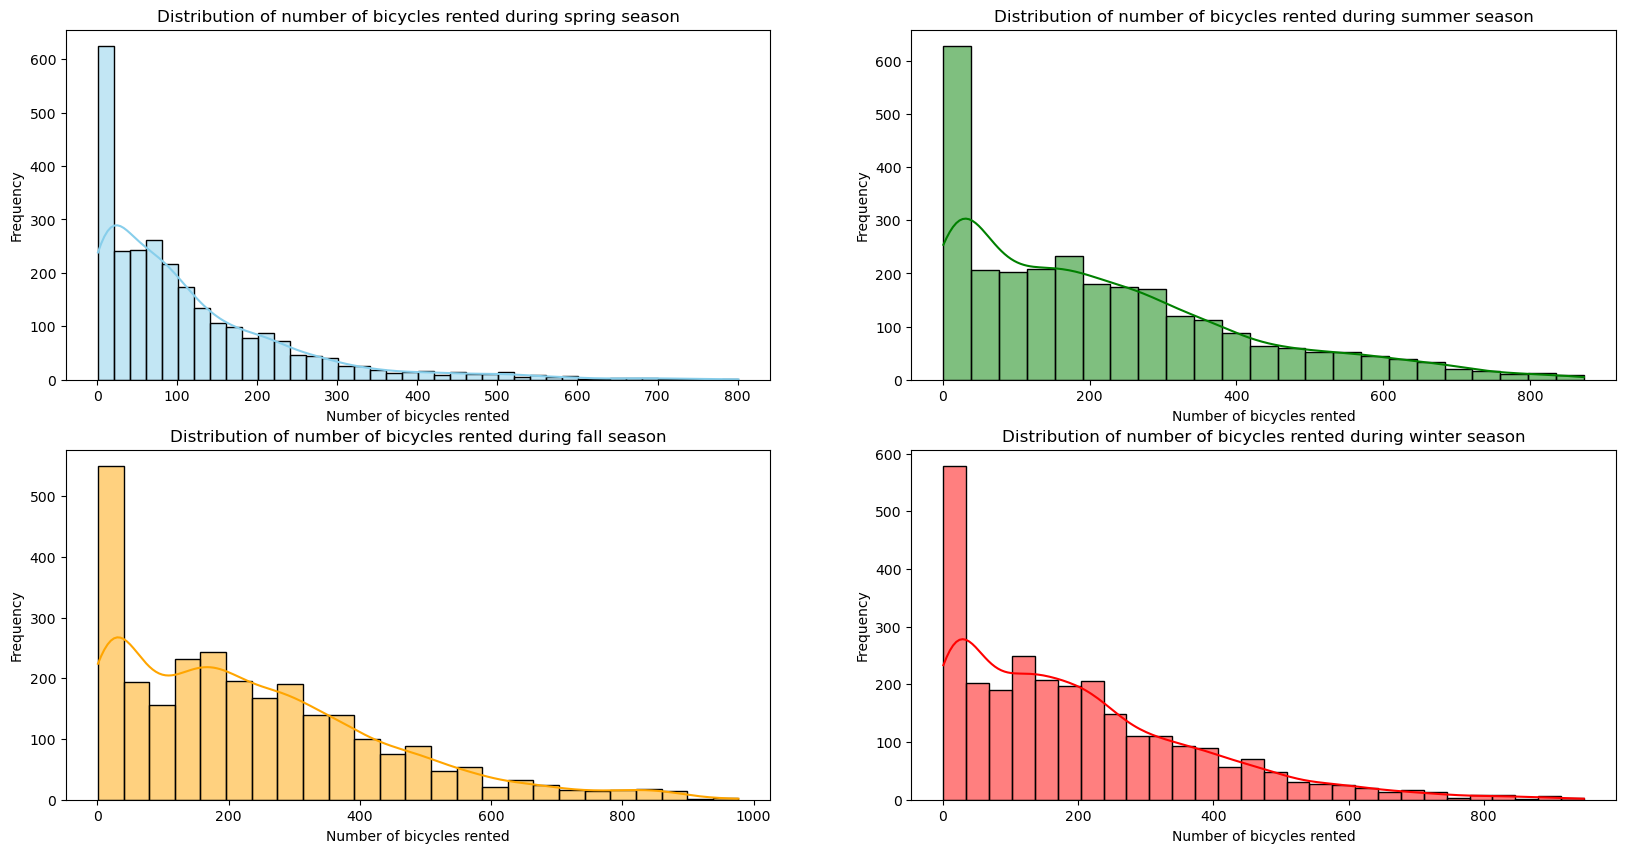

In [40]:
season_cats = ['spring', 'summer', 'fall', 'winter']
season_counts = [spring_count, summer_count, fall_count, winter_count]
colors = ['skyblue', 'g', 'orange', 'r']

plt.figure(figsize = (20, 10))

for i in range(1, 5):
    plt.subplot(220 + i)
    sns.histplot(season_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented during {season_cats[i - 1]} season')

plt.show()

###  Normality test of "count" (number of bicycles rented) across different seasons using `"Shapiro Test"` and `"KS-Test"` 

In [41]:
season_cats = ['spring', 'summer', 'fall', 'winter']
season_counts = [spring_count, summer_count, fall_count, winter_count]
for j in range(len(season_counts)):
    season_cat = season_cats[j]
    season_count = season_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = season_count.sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'The number of bicycles rented in {season_cat} are normally distributed {normality_count * 100 / 1000}% of the times')

The number of bicycles rented in spring are normally distributed 0.9% of the times
The number of bicycles rented in summer are normally distributed 50.3% of the times
The number of bicycles rented in fall are normally distributed 72.9% of the times
The number of bicycles rented in winter are normally distributed 49.7% of the times


### As we can see that the "count" i.e. number of bicycles rented across different seasons are not normally distributed. That's why we have to apply boxcox transformation on all of them to perform ANOVA.

In [42]:
season_cats = ['spring', 'summer', 'fall', 'winter']
transformed_season_counts = [boxcox(season_count)[0] for season_count in season_counts]
boxcox_lambdas = [boxcox(season_count)[1] for season_count in season_counts]
for j in range(len(transformed_season_counts)):
    season_cat = season_cats[j]
    transformed_season_count = transformed_season_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = pd.Series(transformed_season_count).sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented in {season_cat} are normally distributed {normality_count * 100 / 1000}% of the times')

print('\n' + '-' * 150 + '\n')
for k in range(len(boxcox_lambdas)):
    print(f'The boxcox constant "{unicodedata.lookup("GREEK SMALL LETTER LAMDA")}" for {season_cats[k]} = {round(boxcox_lambdas[k], 3)}')

After boxcox transform, the number of bicycles rented in spring are normally distributed 99.8% of the times
After boxcox transform, the number of bicycles rented in summer are normally distributed 99.3% of the times
After boxcox transform, the number of bicycles rented in fall are normally distributed 98.9% of the times
After boxcox transform, the number of bicycles rented in winter are normally distributed 99.0% of the times

------------------------------------------------------------------------------------------------------------------------------------------------------

The boxcox constant "λ" for spring = 0.263
The boxcox constant "λ" for summer = 0.349
The boxcox constant "λ" for fall = 0.393
The boxcox constant "λ" for winter = 0.353


### As we can see that the boxcox constant "$\lambda$" for all the seasons are very close. So we can use mean of them for the boxcox transformation so as to have a fair comparison between different groups.

In [43]:
lambda_mean = np.mean(boxcox_lambdas)
transformed_season_counts = [((season_count ** lambda_mean) - 1)/lambda_mean for season_count in season_counts]

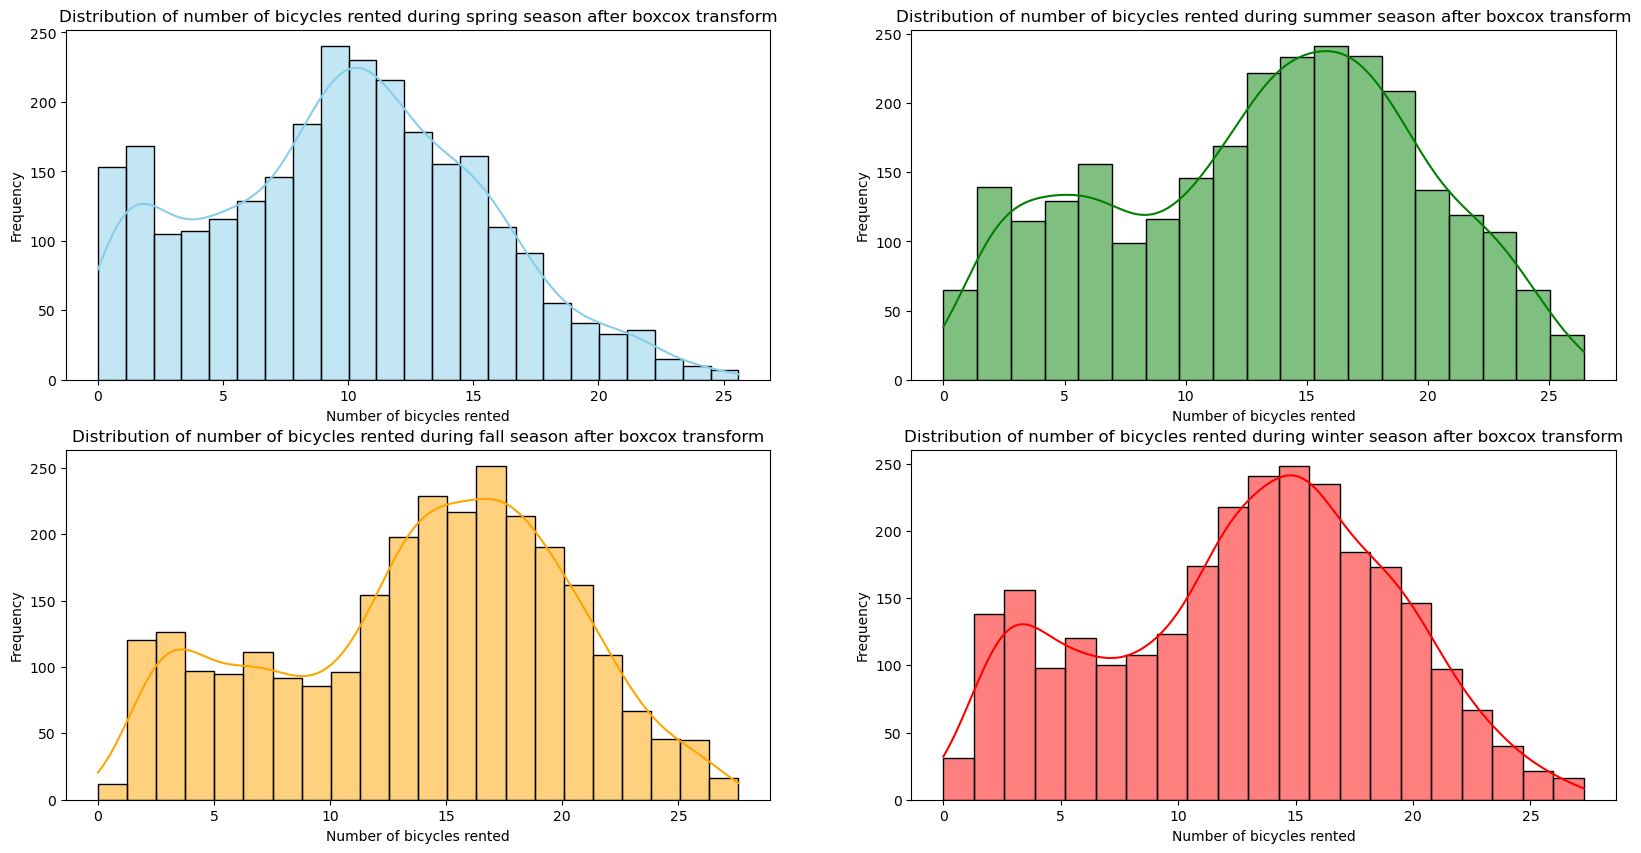

In [44]:
plt.figure(figsize = (20, 10))

for i in range(1, 5):
    plt.subplot(220 + i)
    sns.histplot(transformed_season_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented during {season_cats[i - 1]} season after boxcox transform')

plt.show()

## `Test for equal variance using Levene's Test`

In [45]:
levene_stat, levene_p_val = levene(*transformed_season_counts)
if levene_p_val >= 0.5:
    print(f'Levene test p-value = {levene_p_val}')
    print('The population variances are nearly equal')
else:
    print(f'Levene test p-value = {levene_p_val}')
    print('The population variances are not equal')
    print('Even if the variances are not equal, we will move forward with the analysis') 

Levene test p-value = 1.0938081349355961e-17
The population variances are not equal
Even if the variances are not equal, we will move forward with the analysis


In [46]:
for i in range(4):
    print(f'The sample mean of "count" i.e. number of bicycles rented in {season_cats[i]} after boxcox transform = {transformed_season_counts[i].mean()}')

The sample mean of "count" i.e. number of bicycles rented in spring after boxcox transform = 9.865812700710206
The sample mean of "count" i.e. number of bicycles rented in summer after boxcox transform = 13.201177206894787
The sample mean of "count" i.e. number of bicycles rented in fall after boxcox transform = 13.892740905484306
The sample mean of "count" i.e. number of bicycles rented in winter after boxcox transform = 12.843190069264747


### `'ANOVA'` on boxcox transform of "count" (number of bicycles rented) across different seasons to check whether this difference in sample means is statistically significant.

In [47]:
f_stat, p_value = f_oneway(*transformed_season_counts)
if p_value < 0.05:
    print(f'ANOVA p-value = {p_value}')
    print('Season has a statistically significant effect on "count" i.e. number of bicycles rented across different seasons')
    print('Maximum number of bicycles are rented during fall, summer and winter')
else:
    print(f'ANOVA p-value = {p_value}')
    print('Season has no statistically significant effect on "count" i.e. number of bicycles rented across different seasons')

ANOVA p-value = 8.474194560268781e-145
Season has a statistically significant effect on "count" i.e. number of bicycles rented across different seasons
Maximum number of bicycles are rented during fall, summer and winter


### `Null Hypothesis Rejected`: There's an effect of season on number of bicycles rented.
### `More number of bicycles are rented in summer, winter and fall`

***

## `6. Effect of "holiday" on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of holiday on number of bicycles rented i.e. number of bicycles rented are similiar on holidays and non-holidays

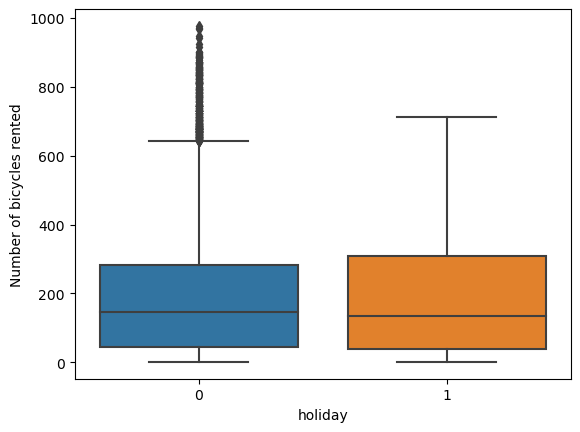

In [48]:
sns.boxplot(data = yulu, x =  "holiday", y = "count")
plt.ylabel('Number of bicycles rented')
plt.show()

In [49]:
holiday_count = yulu.loc[(yulu['holiday'] == 1), 'count']
non_holiday_count = yulu.loc[(yulu['holiday'] == 0), 'count']

print(f'The average number of bicycles rented during holiday is {holiday_count.mean()}')
print(f'The average number of bicycles rented during non holiday is {non_holiday_count.mean()}')

The average number of bicycles rented during holiday is 185.87781350482314
The average number of bicycles rented during non holiday is 191.7416548463357


### `Observations:`
### Seems like the average number of bicycles rented during non-holiday are slightly higher than that on holidays
### But is this data statistically significant or just by chance??

### As `"holiday"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have just 2 categories, we will use `"independent 2 sample t-test"`


In [50]:
t_stat, p_val = ttest_ind(holiday_count, non_holiday_count, alternative = "less")
if p_val < 0.05:
    print(f'p-value for independent 2 sample t-test = {p_val}')
    print('Holiday has statistically significant effect on number of bicycles rented i.e. slightly lesser on holidays')
else:
    print(f'p-value for independent 2 sample t-test = {p_val}')
    print('Holiday has no statistically significant effect on number of bicycles rented i.e. same on holidays vs non-holidays')

p-value for independent 2 sample t-test = 0.28684619416355517
Holiday has no statistically significant effect on number of bicycles rented i.e. same on holidays vs non-holidays


### `Failed to reject Null Hypothesis`: Number of bicycles rented on holidays vs non-holidays are similar.

***

## `7. Effect of "working day" on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of working day on number of bicycles rented i.e. number of bicycles rented are similiar on working days and non-working days.

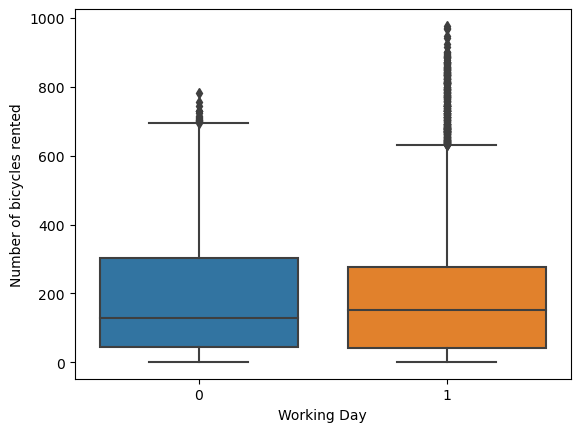

In [51]:
sns.boxplot(data = yulu, x =  "workingday", y = "count")
plt.xlabel('Working Day')
plt.ylabel('Number of bicycles rented')
plt.show()

In [52]:
working_day_count = yulu.loc[(yulu['workingday'] == 1), 'count']
non_working_day_count = yulu.loc[(yulu['workingday'] == 0), 'count']

print(f'The average number of bicycles rented during working days is {working_day_count.mean()}')
print(f'The average number of bicycles rented during non-working days is {non_working_day_count.mean()}')

The average number of bicycles rented during working days is 193.01187263896384
The average number of bicycles rented during non-working days is 188.50662061024755


### `Observations:`
### Seems like the average number of bicycles rented during working days are slightly higher than that on non-working days.
### But is this data statistically significant or just by chance??

### As `"workingday"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have just 2 categories, we will use `"independent 2 sample t-test"`


In [53]:
t_stat, p_val = ttest_ind(working_day_count, non_working_day_count, alternative = "greater")
if p_val < 0.05:
    print(f'p-value for independent 2 sample t-test = {p_val}')
    print('Working day has statistically significant effect on number of bicycles rented i.e. it is higher on working days')
else:
    print(f'p-value for independent 2 sample t-test = {p_val}')
    print('Working day has no statistically significant effect on number of bicycles rented i.e. same on working day vs non-working day')

p-value for independent 2 sample t-test = 0.11322402113180674
Working day has no statistically significant effect on number of bicycles rented i.e. same on working day vs non-working day


### `Failed to reject Null Hypothesis`: Number of bicycles rented on working days vs non-working days are similar.

***

## `8. Effect of "weather" on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of weather on number of bicycles rented i.e. number of bicycles rented are similiar across all weather.

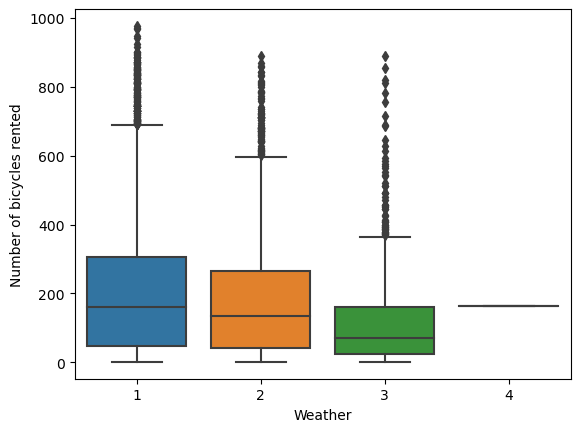

In [54]:
sns.boxplot(data = yulu, x =  "weather", y = "count")
plt.xlabel('Weather')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - Seems like number of cycles rented are maximum on weather = 1 i.e. on clear or partly cloudy days, 
#### - then decreasing marginally on `"weather = 2"` i.e. Mist + Cloudy days, 
#### - then taking a significant dip on `"weather = 3"` i.e. Light Snow / Light Rain + Thunderstorm 
#### - and then suddenly increases on `"weather = 4"` i.e. Heavy rains (which is very counter-intuitive as bicycles should be rented least while it is heavily raining.
#### - There is just one data point for `"weather = 4"`. That's why we can just drop it out of the analysis
### `But is this data statistically significant or just by chance??`

#### As `"weather"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have more than 2 categories, we will use `ANOVA` to test whether there is a statistically significant difference between the mean number of bicycles rented during different seasons.

#### But there are few assumptions of `"ANOVA"`:
#### 1. The data across different categories is independent. (For this, we'll have to trust our data)
#### 2. The data points in each category are drawn from a population having normal distribution.
#### 3. The population variance is same across all categories.

In [55]:
clear_count = yulu.loc[(yulu['weather'] == 1), 'count']
mist_cloudy_count = yulu.loc[(yulu['weather'] == 2), 'count']
light_rain_count = yulu.loc[(yulu['weather'] == 3), 'count']
weather_cats = ['clear', 'mist + cloudy', 'light rain']
weather_counts = [clear_count, mist_cloudy_count, light_rain_count]

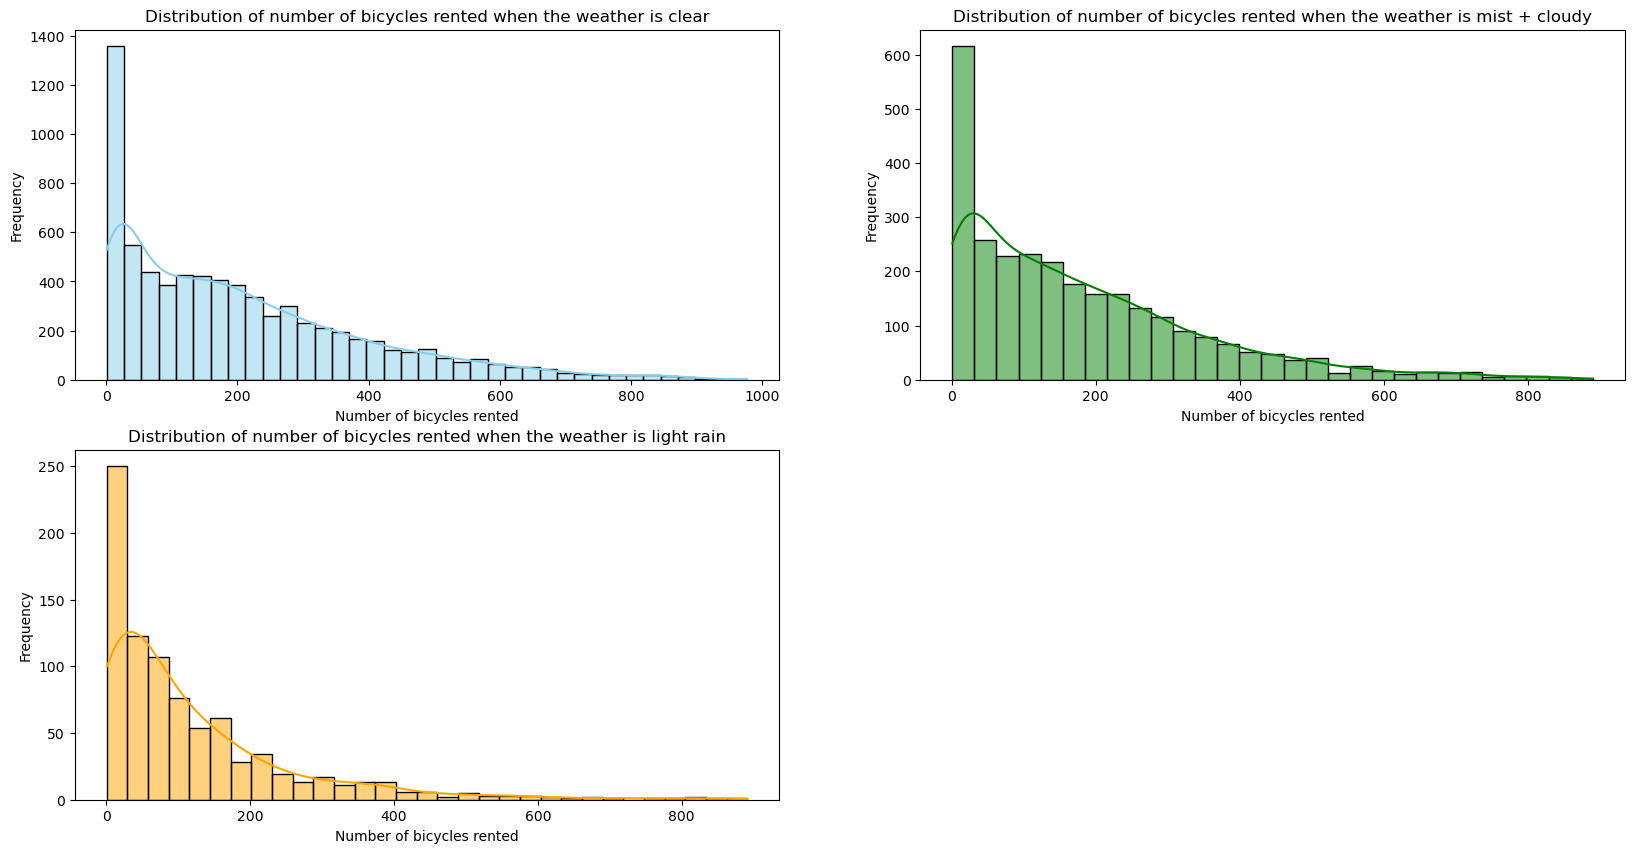

In [56]:
plt.figure(figsize = (20, 10))

for i in range(1, 4):
    plt.subplot(220 + i)
    sns.histplot(weather_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the weather is {weather_cats[i - 1]}')

plt.show()

###  `Normality test of "count" (number of bicycles rented) across different weather using Shapiro Test and KS-Test`

In [57]:
weather_cats = ['clear', 'mist + cloudy', 'light rain']
weather_counts = [clear_count, mist_cloudy_count, light_rain_count]
for j in range(len(weather_counts)):
    weather_cat = weather_cats[j]
    weather_count = weather_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = weather_count.sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'The number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times while the weather is {weather_cat}')

The number of bicycles rented are normally distributed 34.0% of the times while the weather is clear
The number of bicycles rented are normally distributed 23.9% of the times while the weather is mist + cloudy
The number of bicycles rented are normally distributed 0.4% of the times while the weather is light rain


### As we can see that the "count" i.e. number of bicycles rented across different weather are not normally distributed. That's why we have to apply boxcox transformation on them to perform ANOVA.

In [58]:
weather_cats = ['clear', 'mist + cloudy', 'light rain']
transformed_weather_counts = [boxcox(weather_count)[0] for weather_count in weather_counts]
boxcox_lambdas = [boxcox(weather_count)[1] for weather_count in weather_counts]

for j in range(len(transformed_weather_counts)):
    weather_cat = weather_cats[j]
    transformed_weather_count = transformed_weather_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = pd.Series(transformed_weather_count).sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times while the weather is {weather_cat}')

print('\n' + '-' * 150 + '\n')
for k in range(len(boxcox_lambdas)):
    print(f'The boxcox constant "{unicodedata.lookup("GREEK SMALL LETTER LAMDA")}" when the weather is {weather_cats[k]} = {round(boxcox_lambdas[k], 3)}')

After boxcox transform, the number of bicycles rented are normally distributed 99.7% of the times while the weather is clear
After boxcox transform, the number of bicycles rented are normally distributed 99.2% of the times while the weather is mist + cloudy
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times while the weather is light rain

------------------------------------------------------------------------------------------------------------------------------------------------------

The boxcox constant "λ" when the weather is clear = 0.338
The boxcox constant "λ" when the weather is mist + cloudy = 0.318
The boxcox constant "λ" when the weather is light rain = 0.207


### As we can see that the boxcox constant "$\lambda$" for all the seasons are very close. So we can use mean of them for boxcox transform so as to have a fair comparison between different groups.

In [59]:
lambda_mean = np.mean(boxcox_lambdas)
transformed_weather_counts = [((weather_count ** lambda_mean) - 1)/lambda_mean for weather_count in weather_counts]

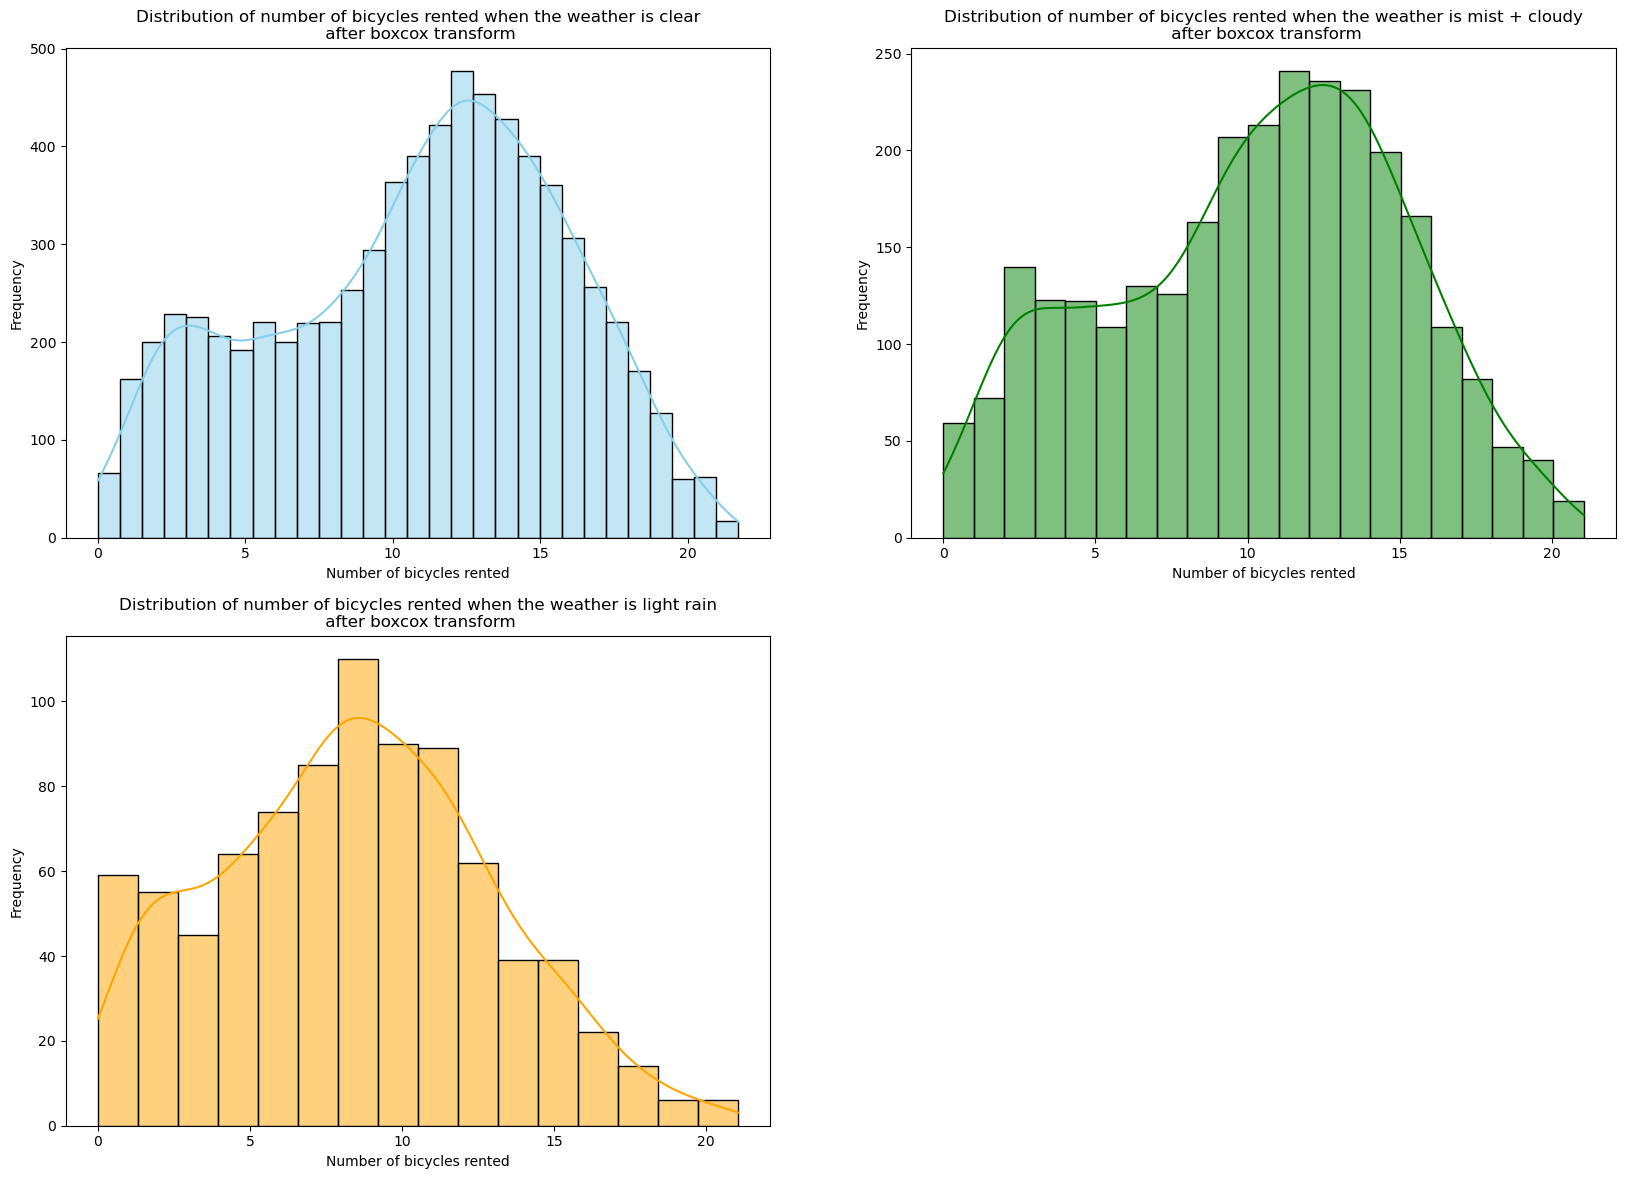

In [60]:
plt.figure(figsize = (20, 14))

for i in range(1, 4):
    plt.subplot(220 + i)
    sns.histplot(transformed_weather_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the weather is {weather_cats[i - 1]}\n after boxcox transform')

plt.show()

In [61]:
for i in range(3):
    print(f'The sample mean of "count" i.e. number of bicycles rented while there is "{weather_cats[i]}" after boxcox transform = {transformed_weather_counts[i].mean()}')

The sample mean of "count" i.e. number of bicycles rented while there is "clear" after boxcox transform = 10.805526889708455
The sample mean of "count" i.e. number of bicycles rented while there is "mist + cloudy" after boxcox transform = 10.248038341907298
The sample mean of "count" i.e. number of bicycles rented while there is "light rain" after boxcox transform = 8.435917668646047


## `Test for equal variance using Levene's Test`

In [62]:
levene_stat, levene_p_val = levene(*transformed_weather_counts)
if levene_p_val >= 0.05:
    print(f'Levene test p-value = {levene_p_val}')
    print('The population variances are nearly equal')
else:
    print(f'Levene test p-value = {levene_p_val}')
    print('The population variances are not equal')
    print('Even if the variances are not equal, we will move forward with the analysis') 

Levene test p-value = 1.1783158419075337e-05
The population variances are not equal
Even if the variances are not equal, we will move forward with the analysis


### `'ANOVA'` on boxcox transform of "count" i.e. number of bicycles rented across different weather to check whether this difference in sample means is statistically significant.

In [63]:
f_stat, p_value = f_oneway(*transformed_weather_counts)
if p_value < 0.05:
    print(f'ANOVA p-value = {p_value}')
    print('Weather has a statistically significant effect on "count" i.e. number of bicycles rented across different seasons')
    print('Maximum number of bicycles are rented while the sky is clear or partly cloudy, the marginally decreases while there is mist and few clouds and then decreases futher in light rains')
else:
    print(f'ANOVA p-value = {p_value}')
    print('Weather has no statistically significant effect on "count" i.e. number of bicycles rented across different weathers')

ANOVA p-value = 6.730115176509281e-41
Weather has a statistically significant effect on "count" i.e. number of bicycles rented across different seasons
Maximum number of bicycles are rented while the sky is clear or partly cloudy, the marginally decreases while there is mist and few clouds and then decreases futher in light rains


### `Null Hypothesis Rejected`: There's a statistically significant effect of weather on number of bicycles rented.
### Maximum number of bicycles are rented on clear or partly cloudy days

***

## `9. Effect of "temp" (Temperature) on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of temperature on number of bicycles rented i.e. number of cycles rented are similar across all temperatures.

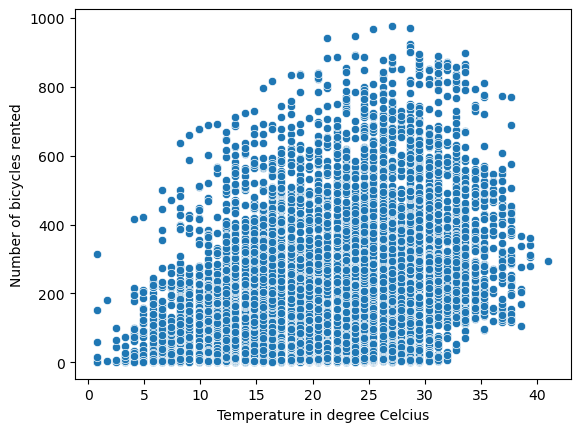

In [64]:
sns.scatterplot(data = yulu, x =  "temp", y = "count")
plt.xlabel('Temperature in degree Celcius')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - There seems to be a weak positive correlation between number of cycles rented and temperature.
#### But is this data statistically significant ??

### To make our analysis more understandable, we can bin the temperature into categorial

In [65]:
yulu['temp_bins'] = pd.cut(yulu['temp'], bins = [-0.25, 10, 20, 30, 45], labels = ['Very Low', 'Low', 'Medium', 'High'])

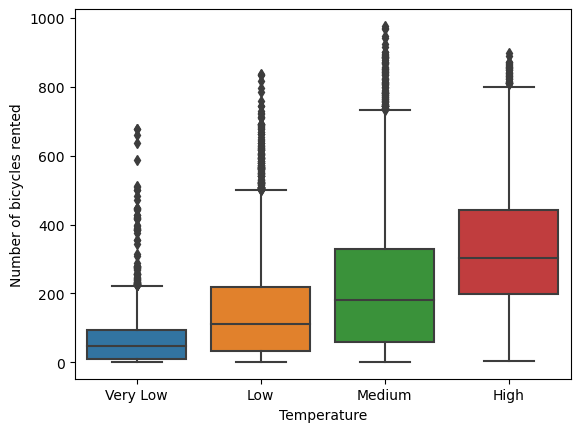

In [66]:
sns.boxplot(data = yulu, x = "temp_bins", y = "count")
plt.xlabel('Temperature')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - Seems like number of cycles rented are minimum when the temperature is very low (0-10 deg C)
#### - then increases when the temperature is low (10-20 deg C), 
#### - then further increases when the temperature is medium (20-30 deg C) 
#### - and then finally increasing when the temperature is high (30-45 deg C)
### `But is this data statistically significant or just by chance??`

In [67]:
very_low_temp_count = yulu.loc[yulu['temp_bins'] == 'Very Low', 'count']
low_temp_count = yulu.loc[yulu['temp_bins'] == 'Low', 'count']
medium_temp_count = yulu.loc[yulu['temp_bins'] == 'Medium', 'count']
high_temp_count = yulu.loc[yulu['temp_bins'] == 'High', 'count']

#### As `"temp_bins"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have more than 2 categories, we will use `ANOVA` to test whether there is a statistically significant difference between the mean number of bicycles rented during different temperature ranges.

#### But there are few assumptions of `"ANOVA"`:
#### 1. The data across different categories is independent. (For this, we'll have to trust our data)
#### 2. The data points in each category are drawn from a population having normal distribution.
#### 3. The population variance is same across all categories.

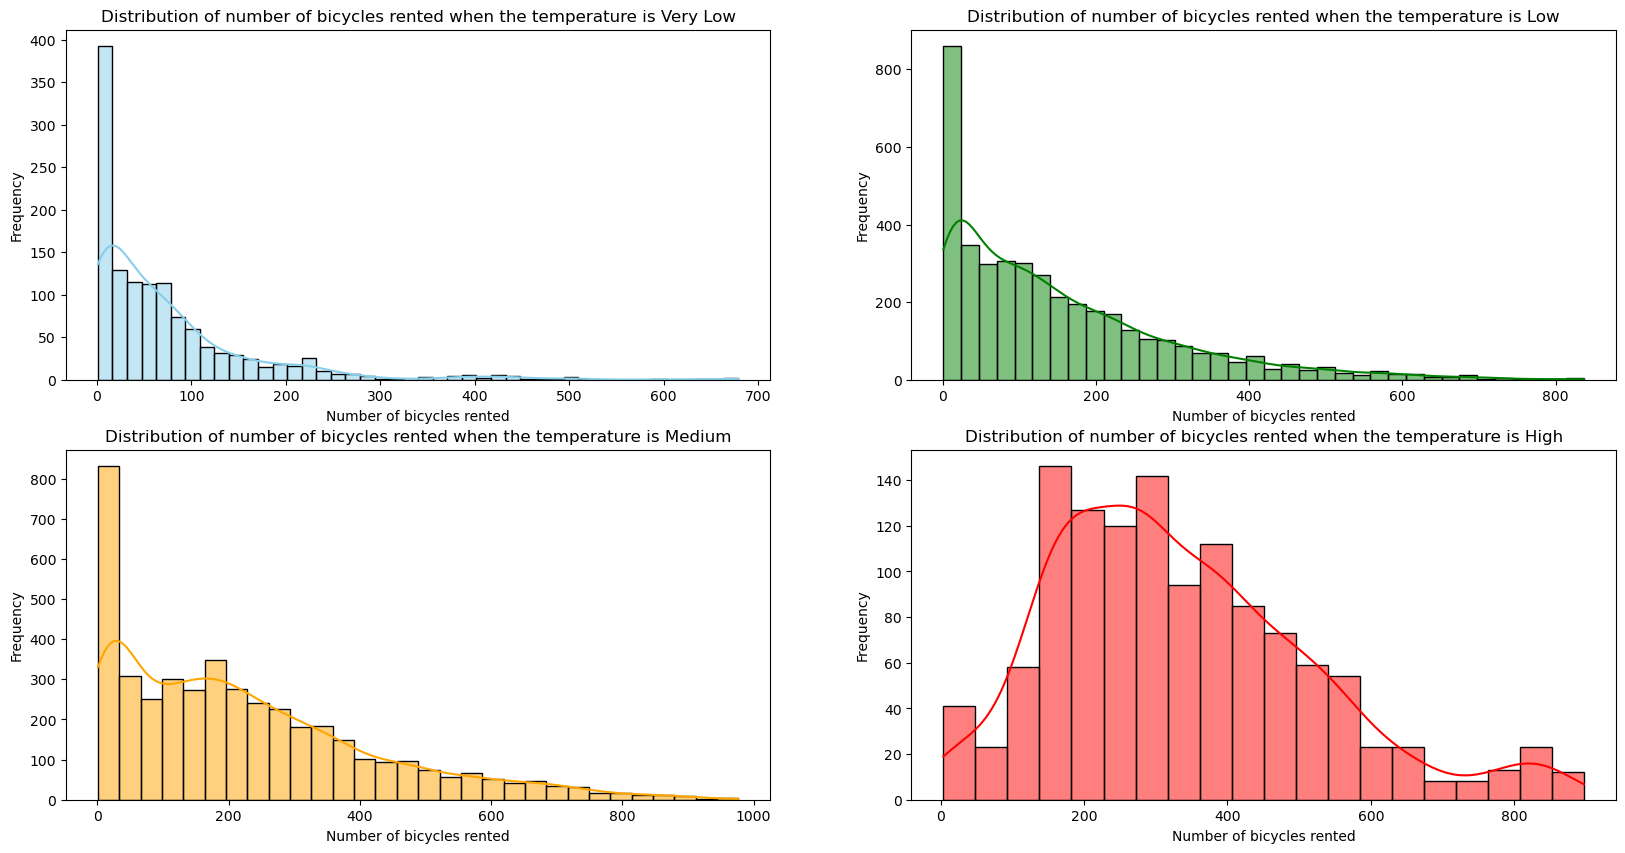

In [68]:
temp_cats = ['Very Low', 'Low', 'Medium', 'High']
temp_counts = [very_low_temp_count, low_temp_count, medium_temp_count, high_temp_count]

plt.figure(figsize = (20, 10))

for i in range(1, 5):
    plt.subplot(220 + i)
    sns.histplot(temp_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the temperature is {temp_cats[i - 1]}')

plt.show()

###  `Normality test of "count" (number of bicycles rented) across different temperature ranges using Shapiro Test and KS-Test`

In [69]:
for j in range(len(temp_counts)):
    temp_cat = temp_cats[j]
    temp_count = temp_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = temp_count.sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'The number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the temperature is {temp_cat}')

The number of bicycles rented are normally distributed 0.0% of the times when the temperature is Very Low
The number of bicycles rented are normally distributed 10.9% of the times when the temperature is Low
The number of bicycles rented are normally distributed 52.5% of the times when the temperature is Medium
The number of bicycles rented are normally distributed 94.8% of the times when the temperature is High


### As we can see that the "count" i.e. number of bicycles rented across different temperature ranges (except when the temperature is high) are not normally distributed. That's why we have to apply boxcox transformation to all of them.

In [70]:
temp_cats = ['Very Low', 'Low', 'Medium', 'High']
transformed_temp_counts = [boxcox(temp_count)[0] for temp_count in temp_counts]
boxcox_lambdas = [boxcox(temp_count)[1] for temp_count in temp_counts]
for j in range(len(transformed_temp_counts)):
    temp_cat = temp_cats[j]
    transformed_temp_count = transformed_temp_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = pd.Series(transformed_temp_count).sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the temperature is {temp_cats[j]}')

print('\n' + '-' * 150 + '\n')
for k in range(len(boxcox_lambdas)):
    print(f'The boxcox constant "{unicodedata.lookup("GREEK SMALL LETTER LAMDA")}" for {temp_cats[k]} = {round(boxcox_lambdas[k], 3)}')

After boxcox transform, the number of bicycles rented are normally distributed 98.1% of the times when the temperature is Very Low
After boxcox transform, the number of bicycles rented are normally distributed 99.9% of the times when the temperature is Low
After boxcox transform, the number of bicycles rented are normally distributed 98.9% of the times when the temperature is Medium
After boxcox transform, the number of bicycles rented are normally distributed 99.9% of the times when the temperature is High

------------------------------------------------------------------------------------------------------------------------------------------------------

The boxcox constant "λ" for Very Low = 0.174
The boxcox constant "λ" for Low = 0.298
The boxcox constant "λ" for Medium = 0.363
The boxcox constant "λ" for High = 0.569


### As we can see that the boxcox constant "$\lambda$" for all the seasons are not very close. So we can try mean of them to transform all of the data and then see, to what extent each of the data is normally distributed.

In [71]:
lambda_mean = np.mean(boxcox_lambdas)
transformed_temp_counts = [((temp_count ** lambda_mean) - 1)/lambda_mean for temp_count in temp_counts]

for j in range(len(transformed_temp_counts)):
    temp_cat = temp_cats[j]
    transformed_temp_count = transformed_temp_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = pd.Series(transformed_temp_count).sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the temperature is {temp_cats[j]}')

After boxcox transform, the number of bicycles rented are normally distributed 99.6% of the times when the temperature is Very Low
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the temperature is Low
After boxcox transform, the number of bicycles rented are normally distributed 98.6% of the times when the temperature is Medium
After boxcox transform, the number of bicycles rented are normally distributed 99.7% of the times when the temperature is High


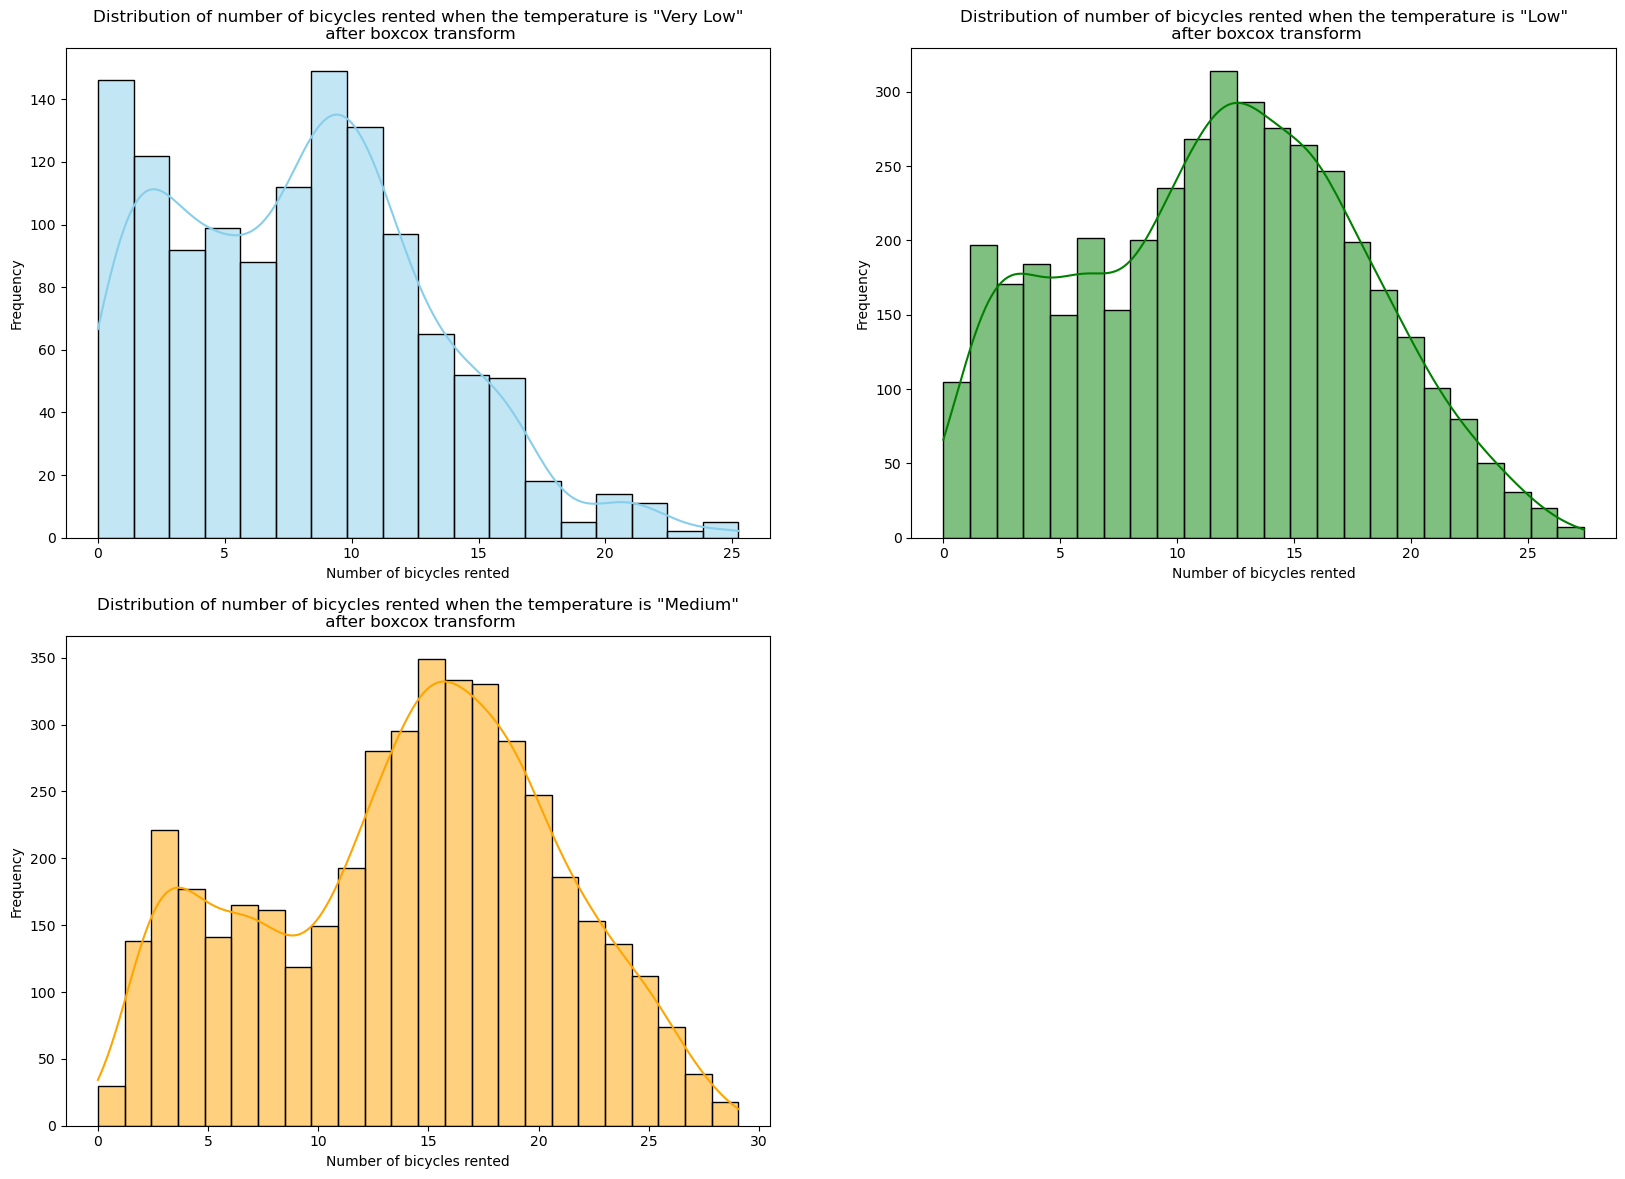

In [72]:
plt.figure(figsize = (20, 14))

for i in range(1, 4):
    plt.subplot(220 + i)
    sns.histplot(transformed_temp_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the temperature is "{temp_cats[i - 1]}"\n after boxcox transform')

plt.show()

### We can clearly see that even after using the mean of four boxcox constant $\lambda$'s, the data is still normally distributed.

## `Test for equal variance using Levene's Test`

In [73]:
levene_stat, levene_p_val = levene(*transformed_temp_counts)
if levene_p_val >= 0.05:
    print(f'Levene test p-value = {levene_p_val}')
    print('The population variances are nearly equal')
else:
    print(f'Levene test p-value = {levene_p_val}')
    print('The population variances are not equal')
    print('Even if the variances are not equal, we will move forward with the analysis') 

Levene test p-value = 9.907961849762892e-71
The population variances are not equal
Even if the variances are not equal, we will move forward with the analysis


In [74]:
for i in range(4):
    print(f'The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the temperature is {temp_cats[i]} = {transformed_temp_counts[i].mean()}')

The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the temperature is Very Low = 7.989305262846514
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the temperature is Low = 11.669804593655833
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the temperature is Medium = 14.071940800957615
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the temperature is High = 18.20772719190024


### `'ANOVA'` on boxcox transform of "count" i.e. number of bicycles rented across different temperature ranges to check whether this difference in sample means is statistically significant.

In [75]:
f_stat, p_value = f_oneway(*transformed_temp_counts)
if p_value < 0.05:
    print(f'ANOVA p-value = {p_value}')
    print('Temperature has a statistically significant effect on "count" i.e. number of bicycles rented across different seasons')
    print("Temperature has a positive correlation with number of bicycles rented i.e. maximum number of bicycles are rented")
    print('when the temperature is high and minimum when the temperature is very low')
else:
    print(f'ANOVA p-value = {p_value}')
    print('Temperature has no statistically significant effect on "count" i.e. number of bicycles rented')

ANOVA p-value = 0.0
Temperature has a statistically significant effect on "count" i.e. number of bicycles rented across different seasons
Temperature has a positive correlation with number of bicycles rented i.e. maximum number of bicycles are rented
when the temperature is high and minimum when the temperature is very low


### `Null Hypothesis Rejected`: There's an effect of temperature on number of bicycles rented i.e. more number of bicycles are rented on warmer days.

***

## `10. Effect of "atemp" (Feeling Temperature) on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of feeling temperature on number of bicycles rented i.e. number of bicycles rented are similar across different feeling temperature ranges.

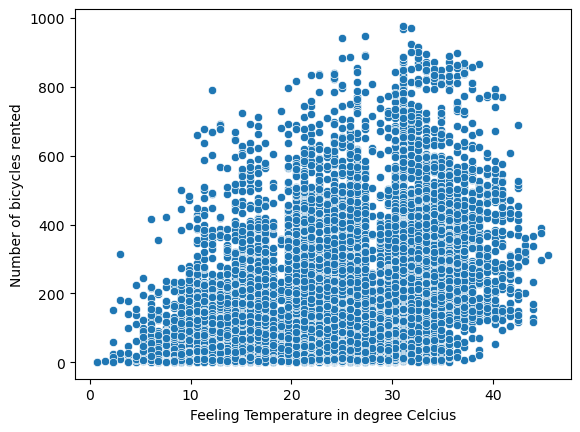

In [76]:
sns.scatterplot(data = yulu, x =  "atemp", y = "count")
plt.xlabel('Feeling Temperature in degree Celcius')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
### - There seems to be a weak positive correlation between number of cycles rented and feeling temperature.
### But is this data statistically significant or just by chance??

### To make our analysis more understandable, we can bin the "atemp" (feeling temperature) into categorial

In [77]:
yulu['atemp_bins'] = pd.cut(yulu['atemp'], bins = [-0.25, 10, 20, 30, 40, 50], labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])

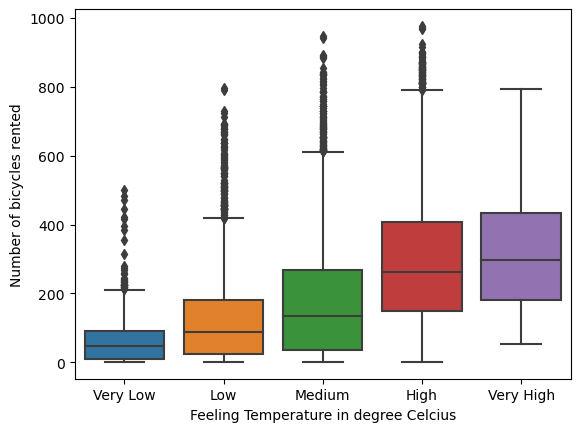

In [78]:
sns.boxplot(data = yulu, x = "atemp_bins", y = "count")
plt.xlabel('Feeling Temperature in degree Celcius')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - Seems like number of cycles rented is minimum when the feeling temperature is very low (0-10 deg C)
#### - then increases when the feeling temperature is low (10-20 deg C), 
#### - then further increases when the feeling temperature is medium (20-30 deg C) 
#### - and then increasing when the feeling temperature is high (30-40 deg C)
#### - and finally maximum when the feeling temperature is very high (40-50 deg C)
### `But is this data statistically significant or just by chance??`

In [79]:
very_low_atemp_count = yulu.loc[yulu['atemp_bins'] == 'Very Low', 'count']
low_atemp_count = yulu.loc[yulu['atemp_bins'] == 'Low', 'count']
medium_atemp_count = yulu.loc[yulu['atemp_bins'] == 'Medium', 'count']
high_atemp_count = yulu.loc[yulu['atemp_bins'] == 'High', 'count']
very_high_atemp_count = yulu.loc[yulu['atemp_bins'] == 'Very High', 'count']

#### As `"atemp_bins"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have more than 2 categories, we will use `ANOVA` to test whether there is a statistically significant difference between the mean number of bicycles rented across different feeling temperature ranges.

#### But there are few assumptions of `"ANOVA"`:
#### 1. The data across different categories is independent. (For this, we'll have to trust our data)
#### 2. The data points in each category are drawn from a population having normal distribution.
#### 3. The population variance is same across all categories.

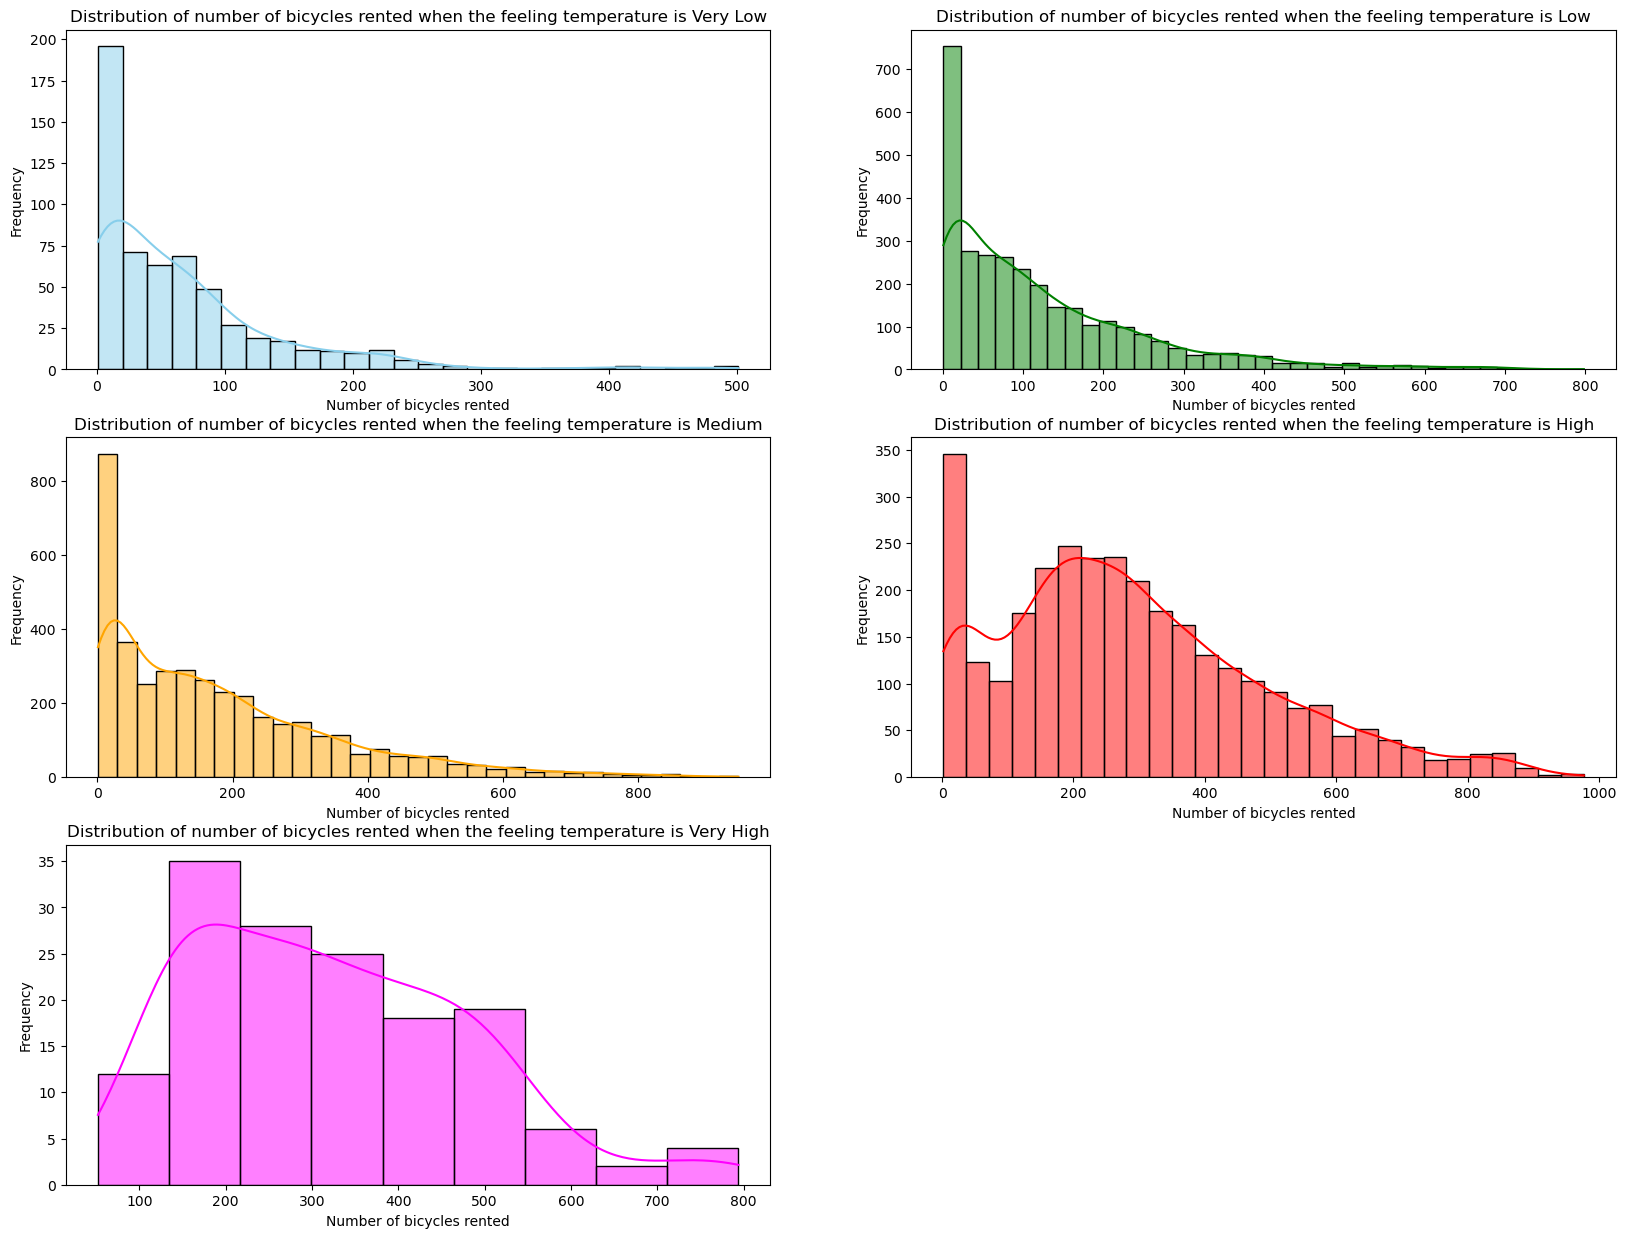

In [80]:
colors = ['skyblue', 'g', 'orange', 'r', 'magenta']
atemp_cats = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
atemp_counts = [very_low_atemp_count, low_atemp_count, medium_atemp_count, high_atemp_count, very_high_atemp_count]

plt.figure(figsize = (20, 15))

for i in range(1, 6):
    plt.subplot(320 + i)
    sns.histplot(atemp_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the feeling temperature is {atemp_cats[i - 1]}')

plt.show()

###  `Normality test of "count" (number of bicycles rented) across different feeling temperature ranges using Shapiro Test and KS-Test.`

In [81]:
atemp_cats = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
atemp_counts = [very_low_atemp_count, low_atemp_count, medium_atemp_count, high_atemp_count, very_high_atemp_count]
for j in range(len(atemp_counts)):
    atemp_cat = atemp_cats[j]
    atemp_count = atemp_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = atemp_count.sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'The number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the feeling temperature is {atemp_cat}')

The number of bicycles rented are normally distributed 0.5% of the times when the feeling temperature is Very Low
The number of bicycles rented are normally distributed 1.8% of the times when the feeling temperature is Low
The number of bicycles rented are normally distributed 19.6% of the times when the feeling temperature is Medium
The number of bicycles rented are normally distributed 94.6% of the times when the feeling temperature is High
The number of bicycles rented are normally distributed 100.0% of the times when the feeling temperature is Very High


### As we can see that the "count" i.e. number of bicycles rented across different feeling temperature ranges (except when the feeling temperature is high or very high) are not normally distributed. That's why we have to apply boxcox transformation to all of them.

In [82]:
atemp_cats = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
transformed_atemp_counts = [boxcox(atemp_count)[0] for atemp_count in atemp_counts]
boxcox_lambdas = [boxcox(atemp_count)[1] for atemp_count in atemp_counts]
for j in range(len(transformed_atemp_counts)):
    atemp_cat = atemp_cats[j]
    transformed_atemp_count = transformed_atemp_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = pd.Series(transformed_atemp_count).sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the feeling temperature is {atemp_cats[j]}')

print('\n' + '-' * 150 + '\n')
for k in range(len(boxcox_lambdas)):
    print(f'The boxcox constant "{unicodedata.lookup("GREEK SMALL LETTER LAMDA")}" for {atemp_cats[k]} = {round(boxcox_lambdas[k], 3)}')

After boxcox transform, the number of bicycles rented are normally distributed 98.8% of the times when the feeling temperature is Very Low
After boxcox transform, the number of bicycles rented are normally distributed 99.4% of the times when the feeling temperature is Low
After boxcox transform, the number of bicycles rented are normally distributed 99.3% of the times when the feeling temperature is Medium
After boxcox transform, the number of bicycles rented are normally distributed 99.9% of the times when the feeling temperature is High
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the feeling temperature is Very High

------------------------------------------------------------------------------------------------------------------------------------------------------

The boxcox constant "λ" for Very Low = 0.225
The boxcox constant "λ" for Low = 0.258
The boxcox constant "λ" for Medium = 0.302
The boxcox constant "λ" for High 

### As we can see that the boxcox constant "$\lambda$" for all the seasons are not very close. So we can try mean of them to transform all of the data and then see, to what extent each of the data is normally distributed.

In [83]:
lambda_mean = np.mean(boxcox_lambdas)
transformed_atemp_counts = [((atemp_count ** lambda_mean) - 1)/lambda_mean for atemp_count in atemp_counts]

for j in range(len(transformed_atemp_counts)):
    atemp_cat = atemp_cats[j]
    transformed_atemp_count = transformed_atemp_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = pd.Series(transformed_atemp_count).sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the feeling temperature is {atemp_cats[j]}')

After boxcox transform, the number of bicycles rented are normally distributed 99.4% of the times when the feeling temperature is Very Low
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the feeling temperature is Low
After boxcox transform, the number of bicycles rented are normally distributed 99.8% of the times when the feeling temperature is Medium
After boxcox transform, the number of bicycles rented are normally distributed 89.1% of the times when the feeling temperature is High
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the feeling temperature is Very High


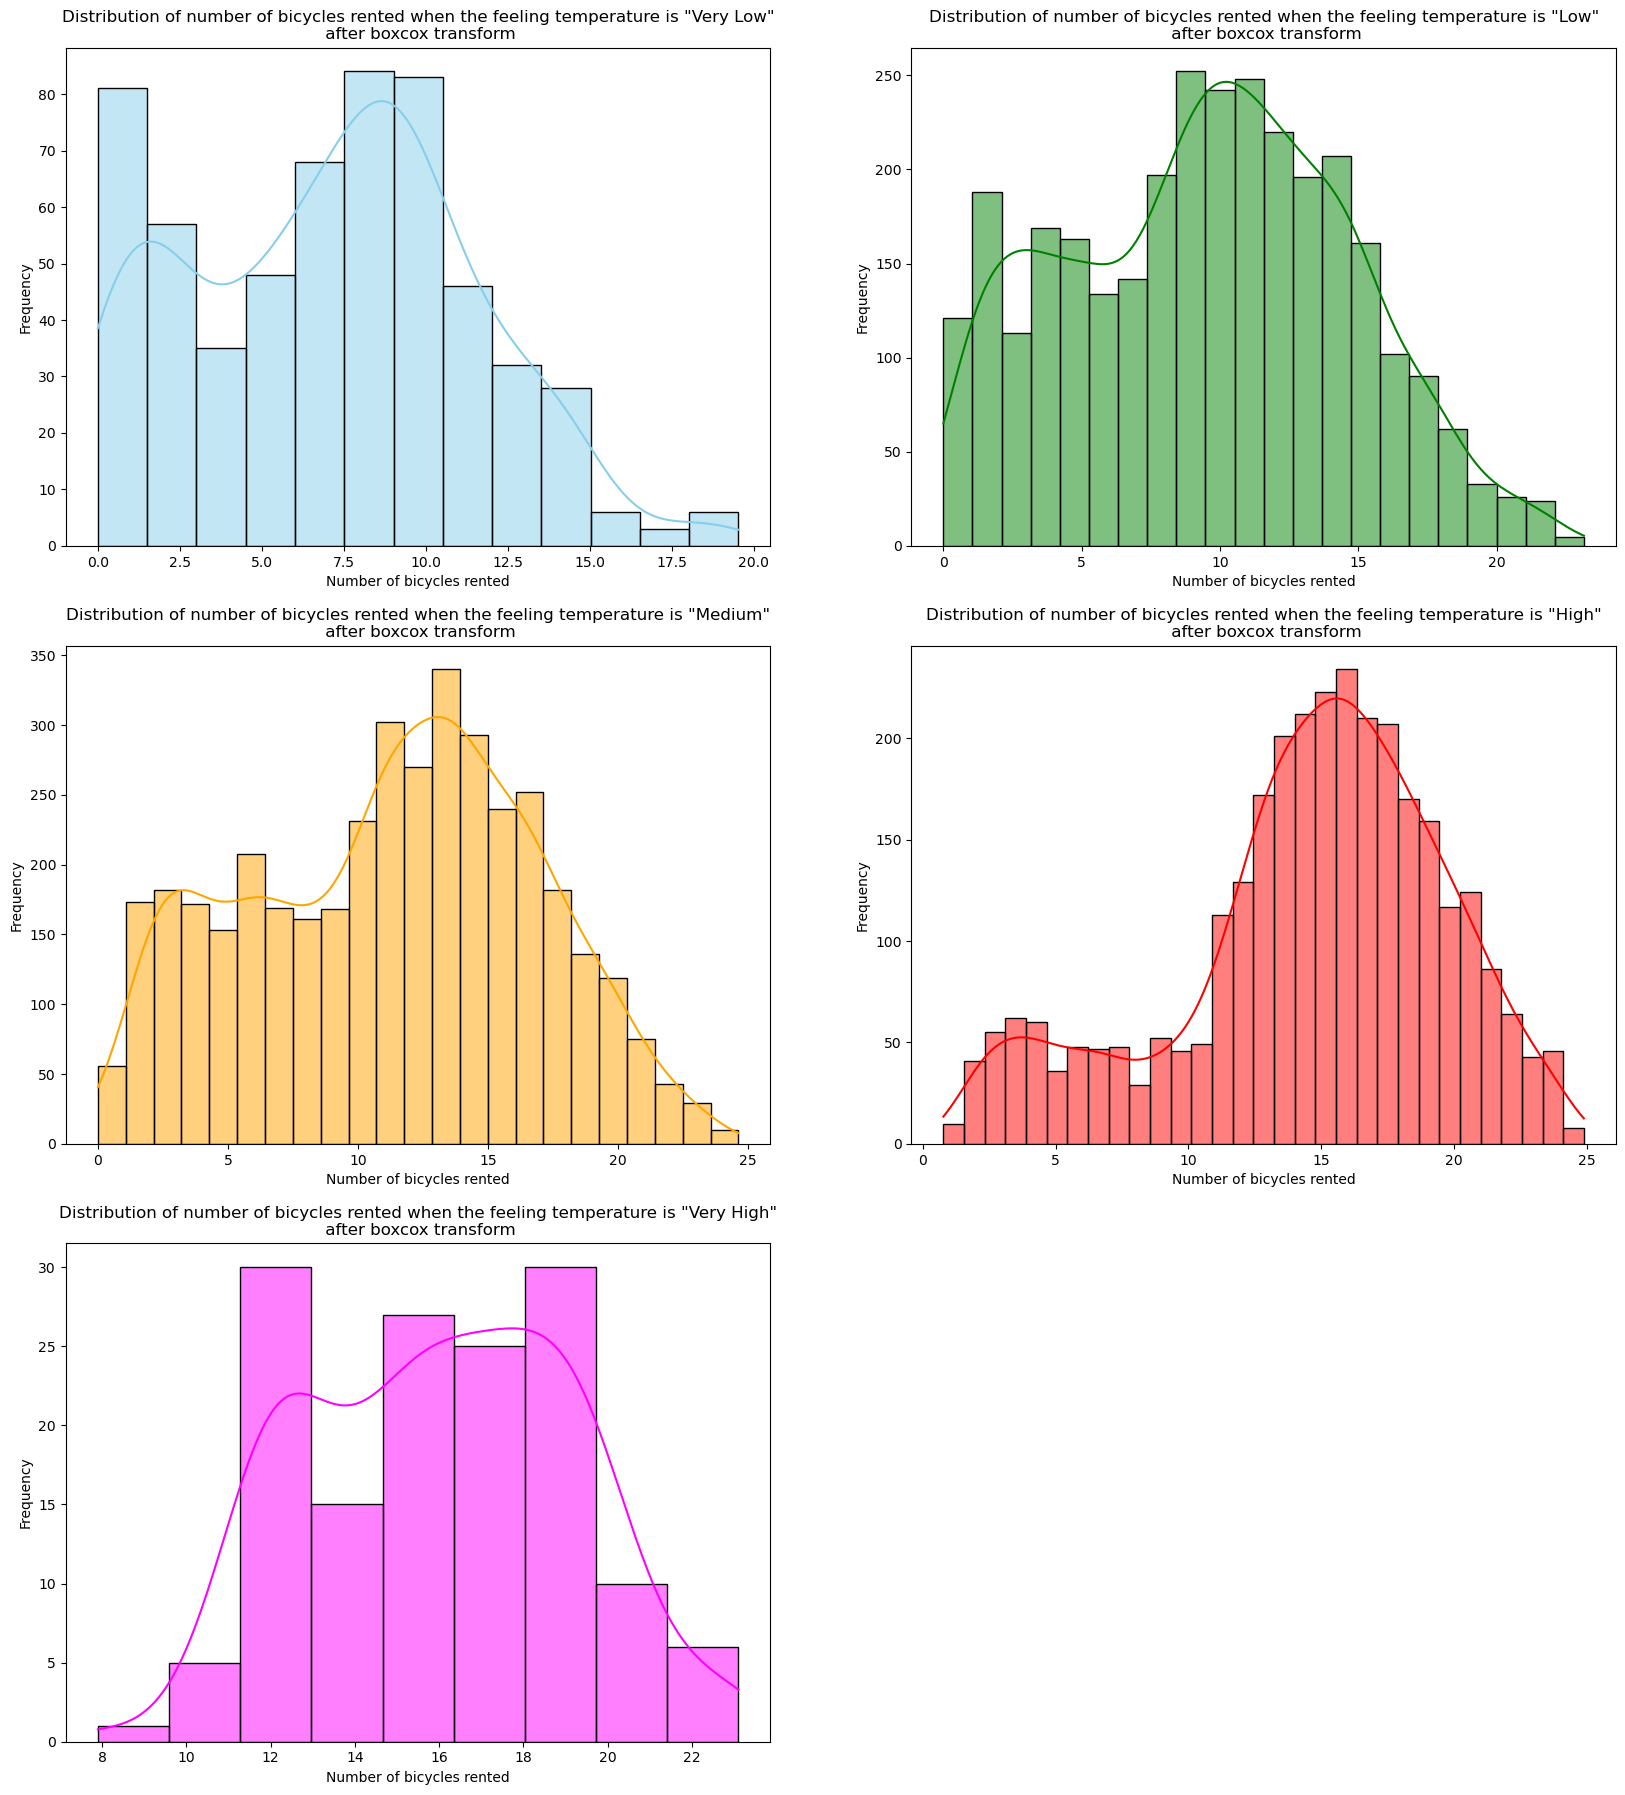

In [84]:
plt.figure(figsize = (20, 22))

for i in range(1, 6):
    plt.subplot(320 + i)
    sns.histplot(transformed_atemp_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the feeling temperature is "{atemp_cats[i - 1]}"\n after boxcox transform')

plt.show()

### We can clearly see that even after using the mean of four boxcox constant $\lambda$'s, the data has come closer to normal distribution.

## `Test for equal variance using Levene's Test`

In [85]:
levene_stat, levene_p_val = levene(*transformed_atemp_counts)
if levene_p_val >= 0.05:
    print(f"Levene's p-value = {levene_p_val}")
    print('The population variances are nearly equal')
else:
    print(f"Levene's p-value = {levene_p_val}")
    print('The population variances are not equal')
    print('Even if the variances are not equal, we will move forward with the analysis') 

Levene's p-value = 8.686477991442728e-29
The population variances are not equal
Even if the variances are not equal, we will move forward with the analysis


In [86]:
for i in range(4):
    print(f'The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the feeling temperature is {atemp_cats[i]} = {transformed_atemp_counts[i].mean()}')

The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the feeling temperature is Very Low = 7.121862463527508
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the feeling temperature is Low = 9.556671685103687
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the feeling temperature is Medium = 11.276558736213987
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the feeling temperature is High = 14.549593618404618


### `'ANOVA'` on boxcox transform of "count" i.e. number of bicycles rented across different feeling temperature ranges to check whether this difference in sample means is statistically significant.

In [87]:
f_stat, p_value = f_oneway(*transformed_atemp_counts)
if p_value < 0.05:
    print(f'ANOVA p-value = {p_value}')
    print('Feeling Temperature has a statistically significant effect on "count" i.e. number of bicycles rented')
    print("Feeling Temperature has a positive correlation with number of bicycles rented i.e. maximum number of bicycles are rented")
    print('when the feeling temperature is very high and minimum when it is very low')
else:
    print(f'ANOVA p-value = {p_value}')
    print('Feeling Temperature has no statistically significant effect on "count" i.e. number of bicycles rented')

ANOVA p-value = 0.0
Feeling Temperature has a statistically significant effect on "count" i.e. number of bicycles rented
Feeling Temperature has a positive correlation with number of bicycles rented i.e. maximum number of bicycles are rented
when the feeling temperature is very high and minimum when it is very low


### `Null Hypothesis Rejected`: There's an effect of feeling temperature on number of bicycles rented i.e. more number of cycles are rented on days when the feeling temperature is high.

***

## `11. Effect of "humidity" on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of humidity on number of bicycles rented i.e. number of bicycles rented are similar across all humidity ranges.

### To make our analysis more understandable, we can bin the "humidity" into categorial

In [88]:
yulu['humidity_bins'] = pd.cut(yulu['humidity'], bins = [-0.25, 25, 50, 75, 100], labels = ['Low', 'Medium', 'High', 'Very High'])

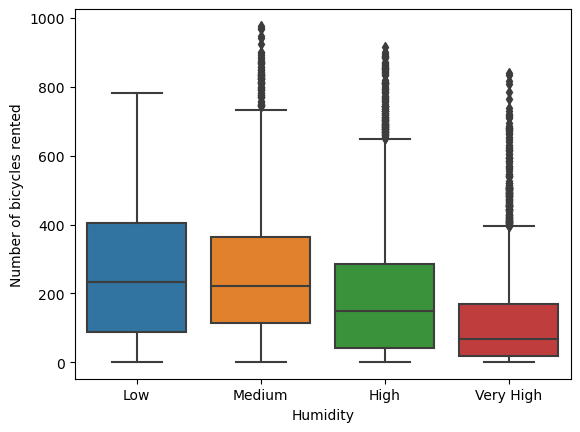

In [89]:
sns.boxplot(data = yulu, x = "humidity_bins", y = "count")
plt.xlabel('Humidity')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - Seems like number of cycles rented is maximum when the humidity is low (0-25)
#### - then decreases when the humidity is medium (25-50), 
#### - then further decreases when the humidity is high (50-75) 
#### - and finally minimum when the humidity is very high (75-100)
#### `i.e. the number of bicycles rented seems to be negatively correlated with humidity`
### `But is this data statistically significant or just by chance??`

In [90]:
low_humidity_count = yulu.loc[(yulu['humidity_bins'] == 'Low'), 'count']
medium_humidity_count = yulu.loc[(yulu['humidity_bins'] == 'Medium'), 'count']
high_humidity_count = yulu.loc[(yulu['humidity_bins'] == 'High'), 'count']
very_high_humidity_count = yulu.loc[(yulu['humidity_bins'] == 'Very High'), 'count']

#### As `"humidity_bins"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have more than 2 categories, we will use `ANOVA` to test whether there is a statistically significant difference between the mean number of bicycles rented across different humidity ranges.

#### But there are few assumptions of `"ANOVA"`:
#### 1. The data across different categories is independent. (For this, we'll have to trust our data)
#### 2. The data points in each category are drawn from a population having normal distribution.
#### 3. The population variance is same across all categories.

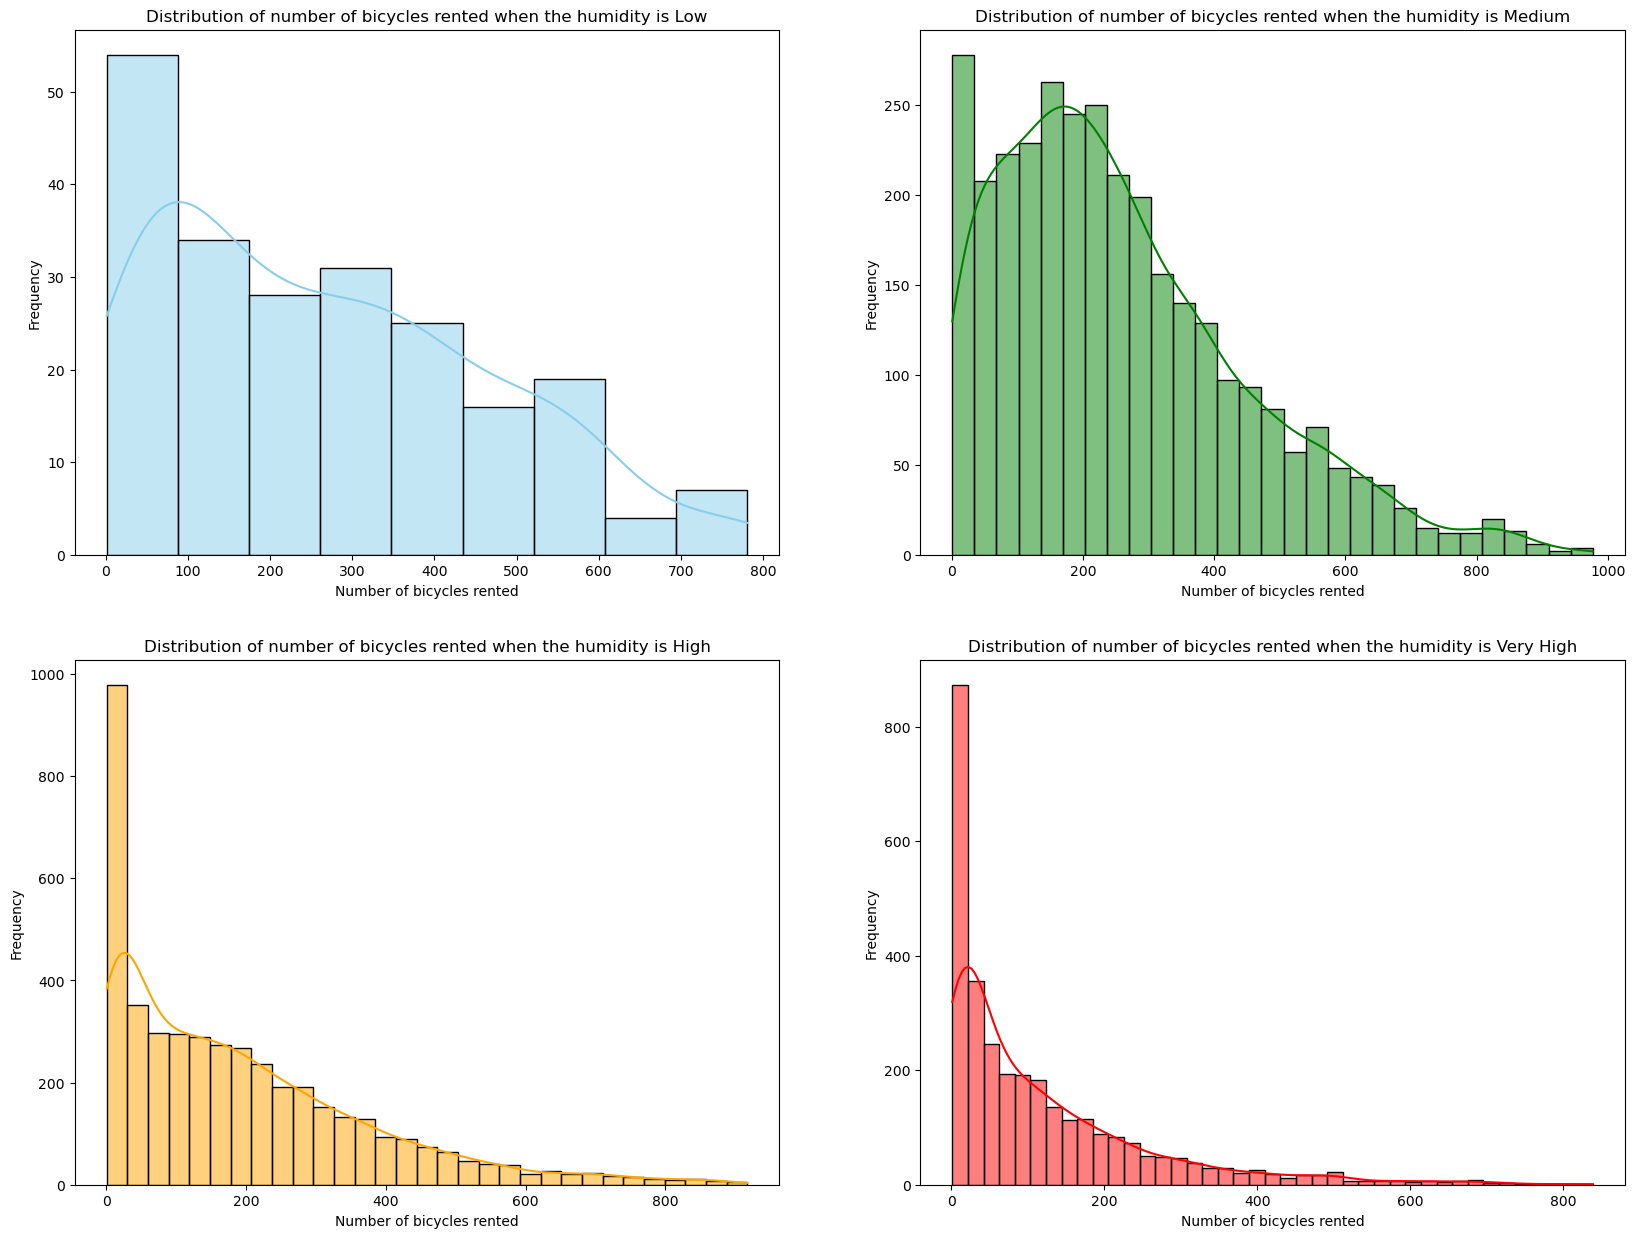

In [91]:
humidity_cats = ['Low', 'Medium', 'High', 'Very High']
humidity_counts = [low_humidity_count, medium_humidity_count, high_humidity_count, very_high_humidity_count]

plt.figure(figsize = (20, 15))

for i in range(1, 5):
    plt.subplot(220 + i)
    sns.histplot(humidity_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the humidity is {humidity_cats[i - 1]}')

plt.show()

###  `Normality test of "count" (number of bicycles rented) across different humidity ranges using Shapiro Test and KS-Test.`

In [92]:
for j in range(len(humidity_counts)):
    humidity_cat = humidity_cats[j]
    humidity_count = humidity_counts[j]
    normality_count = 0
    for i in range(1000):
        sample = atemp_count.sample(100)
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'The number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the humidity is {humidity_cat}')

The number of bicycles rented are normally distributed 100.0% of the times when the humidity is Low
The number of bicycles rented are normally distributed 100.0% of the times when the humidity is Medium
The number of bicycles rented are normally distributed 100.0% of the times when the humidity is High
The number of bicycles rented are normally distributed 100.0% of the times when the humidity is Very High


### As we can see that the "count" i.e. number of bicycles rented across all humidity ranges are normally distributed. That's why we can apply `"ANOVA"` to the data without using boxcox tranform.

## `Test for equal variance using Levene's Test`

In [93]:
levene_stat, levene_p_val = levene(*humidity_counts)
if levene_p_val >= 0.05:
    print(f"Levene's p-value = {levene_p_val}")
    print('The population variances are nearly equal')
else:
    print(f"Levene's p-value = {levene_p_val}")
    print('The population variances are not equal')
    print('Even if the variances are not equal, we will move forward with the analysis') 

Levene's p-value = 2.5803494673170837e-78
The population variances are not equal
Even if the variances are not equal, we will move forward with the analysis


In [94]:
for i in range(4):
    print(f'The sample mean of "count" i.e. number of bicycles rented while the humidity is {humidity_cats[i]} = {humidity_counts[i].mean()}')

The sample mean of "count" i.e. number of bicycles rented while the humidity is Low = 265.9724770642202
The sample mean of "count" i.e. number of bicycles rented while the humidity is Medium = 258.5157728706625
The sample mean of "count" i.e. number of bicycles rented while the humidity is High = 191.16519174041298
The sample mean of "count" i.e. number of bicycles rented while the humidity is Very High = 118.25752183759302


In [95]:
f_stat, p_value = f_oneway(*humidity_counts)
if p_value < 0.05:
    print(f'ANOVA p-value = {p_value}')
    print('Humidity has a statistically significant effect on "count" i.e. number of bicycles rented')
    print("Humidity has a negative correlation with number of bicycles rented i.e. maximum number of bicycles are rented")
    print('when the humidity is low and minimum when it is very high')
else:
    print(f'ANOVA p-value = {p_value}')
    print('Humidity has no statistically significant effect on "count" i.e. number of bicycles rented')

ANOVA p-value = 2.4930418141118143e-221
Humidity has a statistically significant effect on "count" i.e. number of bicycles rented
Humidity has a negative correlation with number of bicycles rented i.e. maximum number of bicycles are rented
when the humidity is low and minimum when it is very high


### `Null Hypothesis Rejected`: There's an effect of humidity on number of bicycles rented i.e maximum number of cycles are rented on days when the humidity is low (0-25).

***

## `12. Effect of "windspeed" on "count" (number of bicycles rented)`

### `Null Hypothesis`: There's no effect of windspeed on number of bicycles rented i.e. the number of bicycles rented are similar across all windspeed ranges.

### To make our analysis more understandable, we can bin the "humidity" into categorial

In [96]:
yulu['windspeed_bins'] = pd.cut(yulu['windspeed'], bins = [-0.25, 20, 40, 60], labels = ['Low', 'Medium', 'High'])

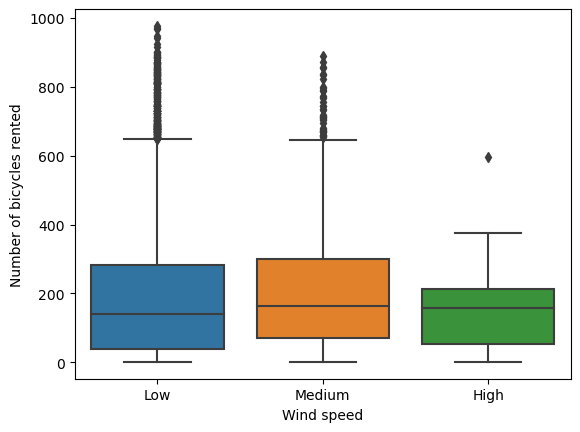

In [97]:
sns.boxplot(data = yulu, x = "windspeed_bins", y = "count")
plt.xlabel('Wind speed')
plt.ylabel('Number of bicycles rented')
plt.show()

### `Observations:`
#### - Seems like number of cycles rented is maximum when the wind speed is medium (20-40) and then gradually decreases whether the wind speed increases or decreases
### `But is this data statistically significant or just by chance??`

In [98]:
low_windspeed_count = yulu.loc[(yulu['windspeed_bins'] == 'Low'), 'count']
medium_windspeed_count = yulu.loc[(yulu['windspeed_bins'] == 'Medium'), 'count']
high_windspeed_count = yulu.loc[(yulu['windspeed_bins'] == 'High'), 'count']

#### As `"windspeed_bins"` is a categorical variable and `"count"` i.e. number of bicycles rented are numeric and we have more than 2 categories, we will use `ANOVA` to test whether there is a statistically significant difference between the mean number of bicycles rented across different windspeed ranges.

#### But there are few assumptions of `"ANOVA"`:
#### 1. The data across different categories is independent. (For this, we'll have to trust our data)
#### 2. The data points in each category are drawn from a population having normal distribution.
#### 3. The population variance is same across all categories.

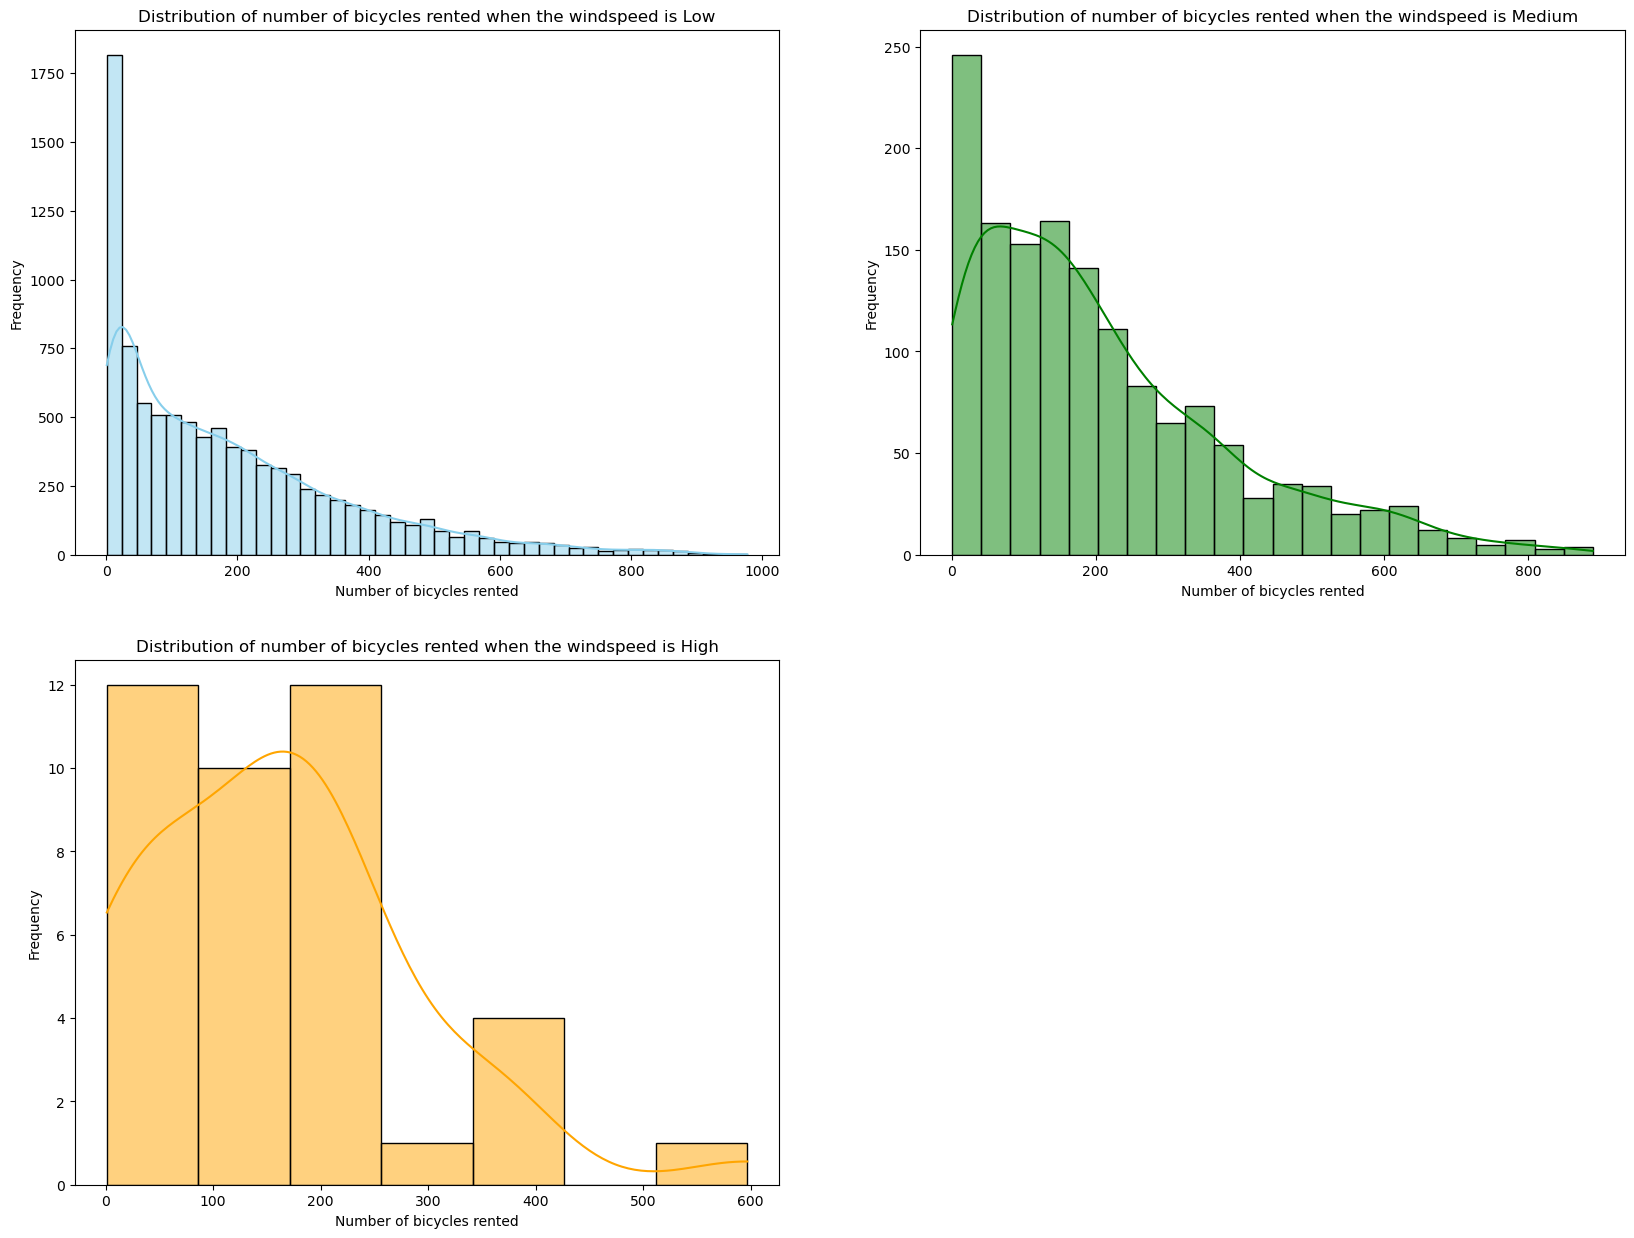

In [99]:
windspeed_cats = ['Low', 'Medium', 'High']
windspeed_counts = [low_windspeed_count, medium_windspeed_count, high_windspeed_count]

plt.figure(figsize = (20, 15))

for i in range(1, 4):
    plt.subplot(220 + i)
    sns.histplot(windspeed_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the windspeed is {windspeed_cats[i - 1]}')

plt.show()

###  `Normality test of "count" (number of bicycles rented) across different windspeed ranges using Shapiro and KS-Test`

In [100]:
windspeed_cats = ['Low', 'Medium', 'High']
windspeed_counts = [low_windspeed_count, medium_windspeed_count, high_windspeed_count]
for j in range(len(windspeed_counts)):
    windspeed_cat = windspeed_cats[j]
    windspeed_count = windspeed_counts[j]
    normality_count = 0
    for i in range(1000):
        try:
            sample = windspeed_count.sample(100)
        except ValueError:
            sample = windspeed_count.sample(windspeed_count.shape[0])
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'The number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the windspeed is {windspeed_cat}')

The number of bicycles rented are normally distributed 13.9% of the times when the windspeed is Low
The number of bicycles rented are normally distributed 44.8% of the times when the windspeed is Medium
The number of bicycles rented are normally distributed 100.0% of the times when the windspeed is High


### As we can see that the "count" i.e. number of bicycles rented across different windspeed ranges (except when the windspeed is high) are not normally distributed. That's why we have to apply boxcox transformation to all of them.

In [101]:
windspeed_cats = ['Low', 'Medium', 'High']
transformed_windspeed_counts = [boxcox(windspeed_count)[0] for windspeed_count in windspeed_counts]
boxcox_lambdas = [boxcox(windspeed_count)[1] for windspeed_count in windspeed_counts]
for j in range(len(transformed_windspeed_counts)):
    windspeed_cat = windspeed_cats[j]
    transformed_windspeed_count = transformed_windspeed_counts[j]
    normality_count = 0
    for i in range(1000):
        try:
            sample = pd.Series(transformed_windspeed_count).sample(100)
        except ValueError:
            sample = pd.Series(transformed_windspeed_count).sample(transformed_windspeed_count.shape[0])
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the windspeed is {windspeed_cats[j]}')

print('\n' + '-' * 150 + '\n')
for k in range(len(boxcox_lambdas)):
    print(f'The boxcox constant "{unicodedata.lookup("GREEK SMALL LETTER LAMDA")}" for {windspeed_cats[k]} = {round(boxcox_lambdas[k], 3)}')

After boxcox transform, the number of bicycles rented are normally distributed 99.6% of the times when the windspeed is Low
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the windspeed is Medium
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the windspeed is High

------------------------------------------------------------------------------------------------------------------------------------------------------

The boxcox constant "λ" for Low = 0.304
The boxcox constant "λ" for Medium = 0.378
The boxcox constant "λ" for High = 0.48


### As we can see that the boxcox constant $\lambda$ for the different windspeed ranges are not very close. So we can try mean of them to transform all of the data and then see, to what extent each of the data is normally distributed.

In [102]:
lambda_mean = np.mean(boxcox_lambdas)
transformed_windspeed_counts = [((windspeed_count ** lambda_mean) - 1)/lambda_mean for windspeed_count in windspeed_counts]

for j in range(len(transformed_windspeed_counts)):
    windspeed_cat = windspeed_cats[j]
    transformed_windspeed_count = transformed_windspeed_counts[j]
    normality_count = 0
    for i in range(1000):
        try:
            sample = pd.Series(transformed_windspeed_count).sample(100)
        except ValueError:
            sample = pd.Series(transformed_windspeed_count).sample(transformed_windspeed_count.shape[0])
        shapiro_p_val = shapiro(sample)[1]
        kstest_p_val = kstest(sample,
                              norm.cdf,
                              args = (sample.mean(), sample.std()))[1]
        if shapiro_p_val > 0.05 or kstest_p_val > 0.05:
            normality_count += 1
    print(f'After boxcox transform, the number of bicycles rented are normally distributed {normality_count * 100 / 1000}% of the times when the windspeed is {windspeed_cats[j]}')

After boxcox transform, the number of bicycles rented are normally distributed 99.8% of the times when the windspeed is Low
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the windspeed is Medium
After boxcox transform, the number of bicycles rented are normally distributed 100.0% of the times when the windspeed is High


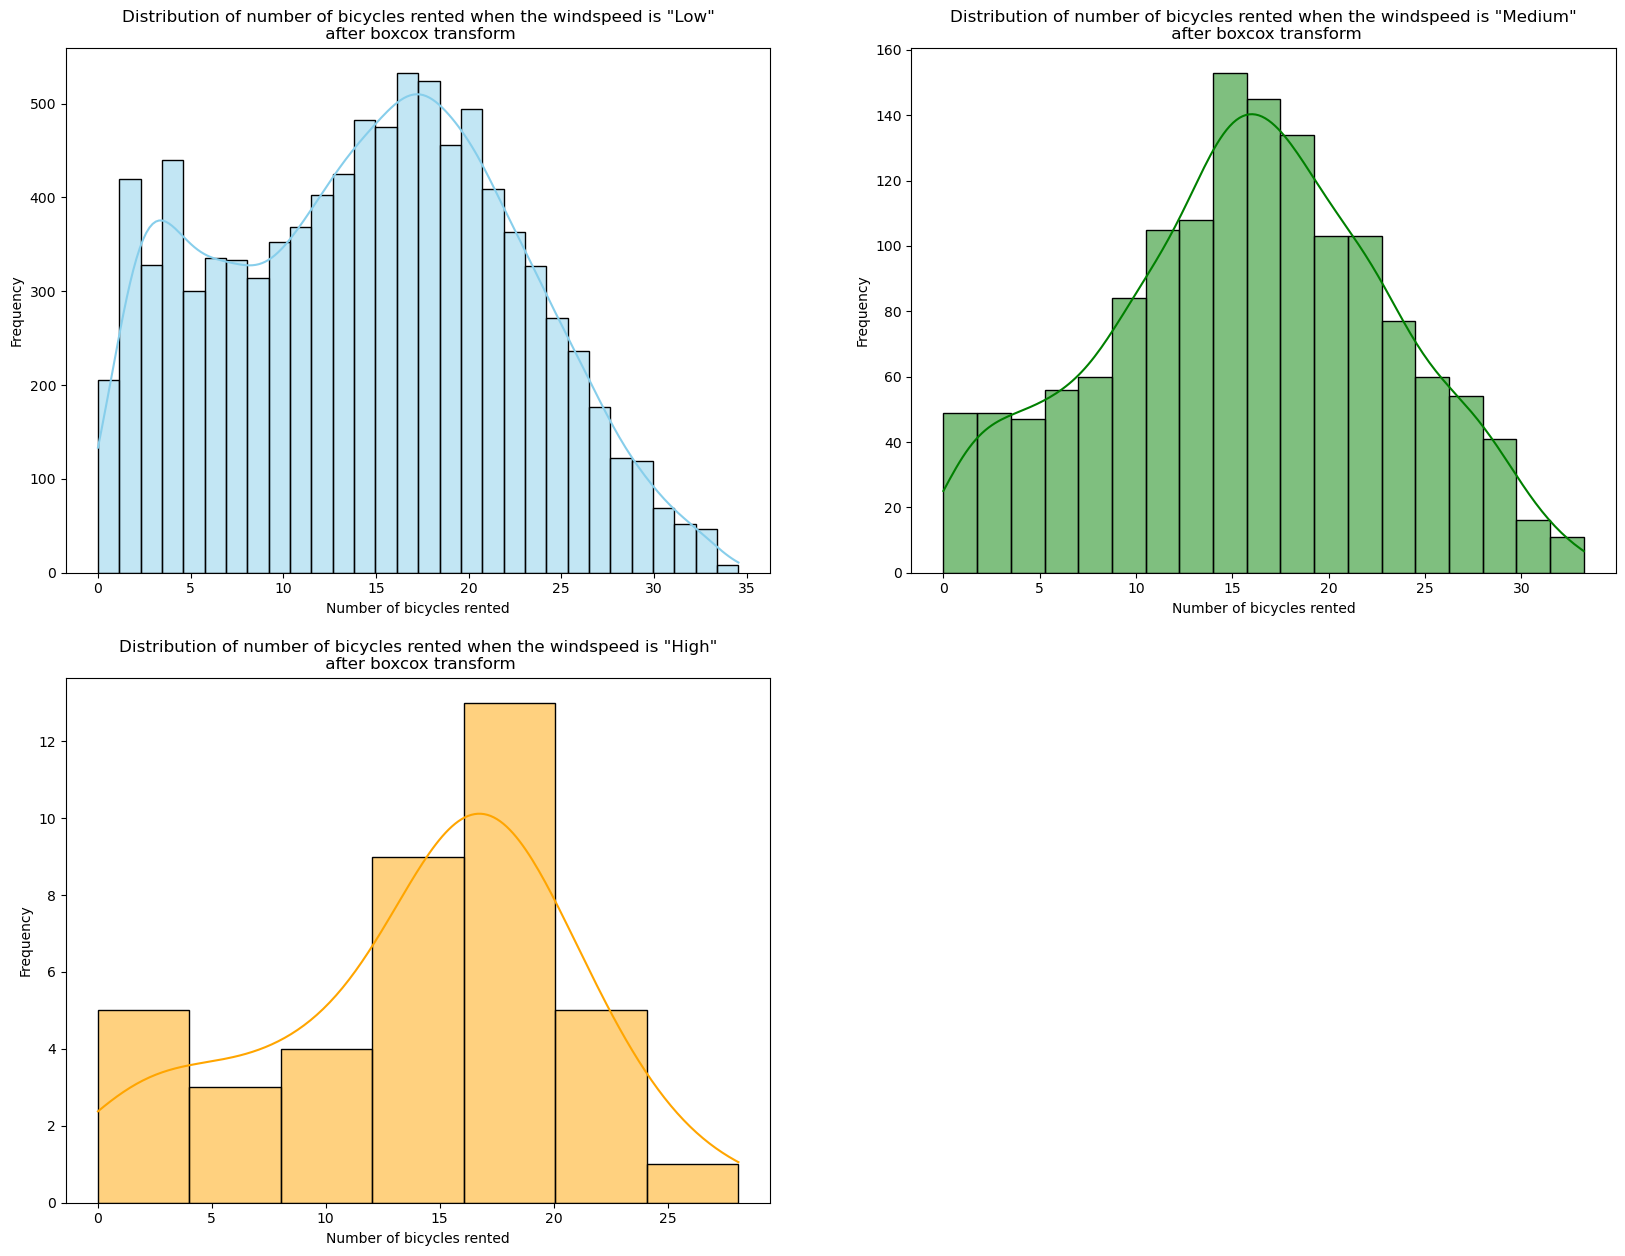

In [103]:
plt.figure(figsize = (20, 15))

for i in range(1, 4):
    plt.subplot(220 + i)
    sns.histplot(transformed_windspeed_counts[i - 1], kde = True, color = colors[i - 1])
    plt.xlabel('Number of bicycles rented')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of number of bicycles rented when the windspeed is "{windspeed_cats[i - 1]}"\n after boxcox transform')

plt.show()

### We can clearly see that even after using the mean of three boxcox constant $\lambda$'s, the data has come closer to normal distribution.

## `Test for equal variance using Levene's Test`

In [104]:
levene_stat, levene_p_val = levene(*transformed_windspeed_counts)
if levene_p_val >= 0.05:
    print(f"Levene's p-value = {levene_p_val}") 
    print('The population variances are nearly equal')
else:
    print(f"Levene's p-value = {levene_p_val}")
    print('The population variances are not equal')
    print('Even if the variances are not equal, we will move forward with the analysis') 

Levene's p-value = 3.940269194076441e-08
The population variances are not equal
Even if the variances are not equal, we will move forward with the analysis


In [105]:
for i in range(3):
    print(f'The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the windspeed is {windspeed_cats[i]} = {transformed_windspeed_counts[i].mean()}')

The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the windspeed is Low = 14.530434962672645
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the windspeed is Medium = 15.755398705852155
The sample mean of "count" i.e. number of bicycles rented in after boxcox transform while the windspeed is High = 14.095525739254763


### `'ANOVA'` on boxcox transform of "count" i.e. number of bicycles rented across different windspeed ranges after to check whether this difference in sample means is statistically significant.

In [106]:
f_stat, p_value = f_oneway(*transformed_windspeed_counts)
if p_value < 0.05:
    print(f"ANOVA p-value = {p_value}")
    print('Windspeed has a statistically significant effect on "count" i.e. number of bicycles rented across different windspeed ranges')
else:
    print(f"ANOVA p-value = {p_value}")
    print('Windspeed has no statistically significant effect on "count" i.e. number of bicycles rented')

ANOVA p-value = 1.724676143792375e-07
Windspeed has a statistically significant effect on "count" i.e. number of bicycles rented across different windspeed ranges


### `Null Hypothesis Rejected`: There's an effect of windspeed on number of bicycles rented.
### Maximum number of cycles are rented on days when the windspeed is medium (20-40).